# STORE SALES PREDICTION

## HYPOTHESIS
### 1.High Oil prices increases sales at Corporation Favorita.
### 2.The earthquake on April 16th did not affect sales in all states of Ecuador.
 
## QUESTIONS
###  1.	Which items and stores did the promotions greatly influence.
###  2.Does the Location of a store influence its sales.
###  3.	Are sales affected by promotions, oil prices and holidays?
###  4.	Which days and months have the lowest and highest sales for each year?
###  5.	Which items sell most notwithstanding promotions, holidays or oil prices.
###  6.	Does the payment of wages in the public sector on the 15th and last days of the month influence the store sales.
###  7.	Which stores does payment of public sector wages greatly influence.
### 8.Which stores sales does holiday seasons greatly influence.

##  IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpathes
import seaborn as sns
import plotly.express as px
import warnings
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
import datetime as dt


from sklearn import preprocessing
from sklearn import *
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_log_error
import calendar

### IMPORTING TRAIN & TESTS DATASETS

In [2]:
Test_Data = pd.read_csv("/Users/emmanythedon/Documents/SALES FORECASTING/test.csv")
Train_Data= pd.read_csv("/Users/emmanythedon/Documents/SALES FORECASTING/train.csv")


#Train = pd.read_csv("/Users/emmanythedon/Documents/SALES FORECASTING/train.csv")

### IMPORTING SUPPLEMENTARY INFORMATION

In [3]:
Holidays =    pd.read_csv("/Users/emmanythedon/Documents/SALES FORECASTING/holidays_events.csv")
Oil_Prices=   pd.read_csv("/Users/emmanythedon/Documents/SALES FORECASTING/oil.csv")
Stores =      pd.read_csv("/Users/emmanythedon/Documents/SALES FORECASTING/stores.csv")
Transactions= pd.read_csv("/Users/emmanythedon/Documents/SALES FORECASTING/transactions.csv")

PREVIEWING TEST AND TRAIN DATASETS

In [4]:
Test_Data

id        date  store_nbr                      family  onpromotion
0      3000888  2017-08-16          1                  AUTOMOTIVE            0
1      3000889  2017-08-16          1                   BABY CARE            0
2      3000890  2017-08-16          1                      BEAUTY            2
3      3000891  2017-08-16          1                   BEVERAGES           20
4      3000892  2017-08-16          1                       BOOKS            0
...        ...         ...        ...                         ...          ...
28507  3029395  2017-08-31          9                     POULTRY            1
28508  3029396  2017-08-31          9              PREPARED FOODS            0
28509  3029397  2017-08-31          9                     PRODUCE            1
28510  3029398  2017-08-31          9  SCHOOL AND OFFICE SUPPLIES            9
28511  3029399  2017-08-31          9                     SEAFOOD            0

[28512 rows x 5 columns]

In [5]:
Train_Data


id        date  store_nbr                      family     sales  \
0              0  2013-01-01          1                  AUTOMOTIVE     0.000   
1              1  2013-01-01          1                   BABY CARE     0.000   
2              2  2013-01-01          1                      BEAUTY     0.000   
3              3  2013-01-01          1                   BEVERAGES     0.000   
4              4  2013-01-01          1                       BOOKS     0.000   
...          ...         ...        ...                         ...       ...   
3000883  3000883  2017-08-15          9                     POULTRY   438.133   
3000884  3000884  2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885  2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887  2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
3000883            0  
3000884            1  
3000885          148  
3000886            8  
3000887            0  

[3000888 rows x 6 columns]

In [6]:
Test_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [7]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


### PREVIEWING SUPPLEMENTARY INFO

In [8]:
Holidays.head()

date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False

In [9]:
Holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [10]:
Oil_Prices.head()

date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20

In [11]:
Oil_Prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [12]:
Stores.head()

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

In [13]:
Stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [14]:
Transactions.head()

date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922

In [15]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


## CHECKING FOR DUPLICATES

In [16]:
Oil_Prices.drop_duplicates(inplace = True)

In [17]:
Oil_Prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.5+ KB


In [18]:
Stores.drop_duplicates(inplace = True)

In [19]:
Stores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.5+ KB


In [20]:
Holidays.drop_duplicates(inplace = True)

In [21]:
Holidays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 16.7+ KB


In [22]:
Transactions.drop_duplicates(inplace = True)

In [23]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ MB


### IDENTIFYING UNIQUE STORES,ITEMS,CITIES AND DATES IN THE DATA

In [24]:
## Individual stores of Corporation Favorita
Train_Data.store_nbr.unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9])

In [25]:
Test_Data.store_nbr.unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9])

In [26]:
Train_Data.family.unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [27]:
Train_Data.family.nunique()

33

In [28]:
Stores.city.unique()

array(['Quito', 'Santo Domingo', 'Cayambe', 'Latacunga', 'Riobamba',
       'Ibarra', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil', 'Salinas',
       'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad', 'Cuenca',
       'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen'],
      dtype=object)

In [29]:
Storesby_City =Stores.groupby(by ='city').store_nbr.agg('count')                                                                                      

In [30]:
Storesby_City

city
Ambato            2
Babahoyo          1
Cayambe           1
Cuenca            3
Daule             1
El Carmen         1
Esmeraldas        1
Guaranda          1
Guayaquil         8
Ibarra            1
Latacunga         2
Libertad          1
Loja              1
Machala           2
Manta             2
Playas            1
Puyo              1
Quevedo           1
Quito            18
Riobamba          1
Salinas           1
Santo Domingo     3
Name: store_nbr, dtype: int64

In [31]:
## checking range of dates
Train_Data.date.min(),Train_Data.date.max() 

('2013-01-01', '2017-08-15')

In [32]:
##Date conversion with datetime
Train_Data['Sales_date']= pd.to_datetime(Train_Data['date']).dt.date

In [33]:
Train_Data.Sales_date.min(),Train_Data.Sales_date.max() 

(datetime.date(2013, 1, 1), datetime.date(2017, 8, 15))

In [34]:
Train_Data.head()

id        date  store_nbr      family  sales  onpromotion  Sales_date
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0  2013-01-01
1   1  2013-01-01          1   BABY CARE    0.0            0  2013-01-01
2   2  2013-01-01          1      BEAUTY    0.0            0  2013-01-01
3   3  2013-01-01          1   BEVERAGES    0.0            0  2013-01-01
4   4  2013-01-01          1       BOOKS    0.0            0  2013-01-01

In [35]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
 6   Sales_date   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 160.3+ MB


### Checking for the completness of the date

In [36]:
##recorded number days
Train_Data.Sales_date.nunique()

1684

In [37]:
date_difference = Train_Data['Sales_date'].max()- Train_Data['Sales_date'].min() 
date_difference

datetime.timedelta(days=1687)

In [38]:
## Expected number of days
date_difference.days + 1

1688

### Finding missing dates.

In [39]:
expected_dates = pd.date_range(start=Train_Data['Sales_date'].min(),end =
                               Train_Data['Sales_date'].max())
expected_dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', length=1688, freq='D')

In [40]:
missing_dates=set(expected_dates.date)- set(Train_Data['Sales_date'].unique())

In [41]:
missing_dates

{datetime.date(2013, 12, 25),
 datetime.date(2014, 12, 25),
 datetime.date(2015, 12, 25),
 datetime.date(2016, 12, 25)}

In [42]:
from itertools import product

In [43]:
missing_dates = set(expected_dates.date) - set(Train_Data.Sales_date.unique())
unique_stores = Train_Data.store_nbr.unique()
unique_families = Train_Data.family.unique()

In [44]:
missing_data = list(product(missing_dates, unique_stores, unique_families))
missing_data

[(datetime.date(2016, 12, 25), 1, 'AUTOMOTIVE'),
 (datetime.date(2016, 12, 25), 1, 'BABY CARE'),
 (datetime.date(2016, 12, 25), 1, 'BEAUTY'),
 (datetime.date(2016, 12, 25), 1, 'BEVERAGES'),
 (datetime.date(2016, 12, 25), 1, 'BOOKS'),
 (datetime.date(2016, 12, 25), 1, 'BREAD/BAKERY'),
 (datetime.date(2016, 12, 25), 1, 'CELEBRATION'),
 (datetime.date(2016, 12, 25), 1, 'CLEANING'),
 (datetime.date(2016, 12, 25), 1, 'DAIRY'),
 (datetime.date(2016, 12, 25), 1, 'DELI'),
 (datetime.date(2016, 12, 25), 1, 'EGGS'),
 (datetime.date(2016, 12, 25), 1, 'FROZEN FOODS'),
 (datetime.date(2016, 12, 25), 1, 'GROCERY I'),
 (datetime.date(2016, 12, 25), 1, 'GROCERY II'),
 (datetime.date(2016, 12, 25), 1, 'HARDWARE'),
 (datetime.date(2016, 12, 25), 1, 'HOME AND KITCHEN I'),
 (datetime.date(2016, 12, 25), 1, 'HOME AND KITCHEN II'),
 (datetime.date(2016, 12, 25), 1, 'HOME APPLIANCES'),
 (datetime.date(2016, 12, 25), 1, 'HOME CARE'),
 (datetime.date(2016, 12, 25), 1, 'LADIESWEAR'),
 (datetime.date(2016, 12, 2

In [45]:
new_data = pd.DataFrame(missing_data, columns = ['Sales_date', 'store_nbr', 'family'])
new_data

Sales_date  store_nbr                      family
0     2016-12-25          1                  AUTOMOTIVE
1     2016-12-25          1                   BABY CARE
2     2016-12-25          1                      BEAUTY
3     2016-12-25          1                   BEVERAGES
4     2016-12-25          1                       BOOKS
...          ...        ...                         ...
7123  2013-12-25          9                     POULTRY
7124  2013-12-25          9              PREPARED FOODS
7125  2013-12-25          9                     PRODUCE
7126  2013-12-25          9  SCHOOL AND OFFICE SUPPLIES
7127  2013-12-25          9                     SEAFOOD

[7128 rows x 3 columns]

In [46]:
merged_data = pd.concat([Train_Data, new_data], ignore_index=False)
merged_data

id        date  store_nbr                      family  sales  \
0     0.0  2013-01-01          1                  AUTOMOTIVE    0.0   
1     1.0  2013-01-01          1                   BABY CARE    0.0   
2     2.0  2013-01-01          1                      BEAUTY    0.0   
3     3.0  2013-01-01          1                   BEVERAGES    0.0   
4     4.0  2013-01-01          1                       BOOKS    0.0   
...   ...         ...        ...                         ...    ...   
7123  NaN         NaN          9                     POULTRY    NaN   
7124  NaN         NaN          9              PREPARED FOODS    NaN   
7125  NaN         NaN          9                     PRODUCE    NaN   
7126  NaN         NaN          9  SCHOOL AND OFFICE SUPPLIES    NaN   
7127  NaN         NaN          9                     SEAFOOD    NaN   

      onpromotion  Sales_date  
0             0.0  2013-01-01  
1             0.0  2013-01-01  
2             0.0  2013-01-01  
3             0.0  2013-01-01  
4             0.0  2013-01-01  
...           ...         ...  
7123          NaN  2013-12-25  
7124          NaN  2013-12-25  
7125          NaN  2013-12-25  
7126          NaN  2013-12-25  
7127          NaN  2013-12-25  

[3008016 rows x 7 columns]

In [47]:
merged_data.drop(['date','id'],axis=1, inplace = True)
merged_data

store_nbr                      family  sales  onpromotion  Sales_date
0             1                  AUTOMOTIVE    0.0          0.0  2013-01-01
1             1                   BABY CARE    0.0          0.0  2013-01-01
2             1                      BEAUTY    0.0          0.0  2013-01-01
3             1                   BEVERAGES    0.0          0.0  2013-01-01
4             1                       BOOKS    0.0          0.0  2013-01-01
...         ...                         ...    ...          ...         ...
7123          9                     POULTRY    NaN          NaN  2013-12-25
7124          9              PREPARED FOODS    NaN          NaN  2013-12-25
7125          9                     PRODUCE    NaN          NaN  2013-12-25
7126          9  SCHOOL AND OFFICE SUPPLIES    NaN          NaN  2013-12-25
7127          9                     SEAFOOD    NaN          NaN  2013-12-25

[3008016 rows x 5 columns]

Ecudoria people are predominantly catholics hence I assumed the stores were closed since the missing 
dates were Christmas periods.

In [48]:
merged_data = merged_data.fillna(0)
merged_data

store_nbr                      family  sales  onpromotion  Sales_date
0             1                  AUTOMOTIVE    0.0          0.0  2013-01-01
1             1                   BABY CARE    0.0          0.0  2013-01-01
2             1                      BEAUTY    0.0          0.0  2013-01-01
3             1                   BEVERAGES    0.0          0.0  2013-01-01
4             1                       BOOKS    0.0          0.0  2013-01-01
...         ...                         ...    ...          ...         ...
7123          9                     POULTRY    0.0          0.0  2013-12-25
7124          9              PREPARED FOODS    0.0          0.0  2013-12-25
7125          9                     PRODUCE    0.0          0.0  2013-12-25
7126          9  SCHOOL AND OFFICE SUPPLIES    0.0          0.0  2013-12-25
7127          9                     SEAFOOD    0.0          0.0  2013-12-25

[3008016 rows x 5 columns]

### Filling in missing oil prices

In [49]:
Oil_Prices.head()

date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20

In [50]:
Oil_Prices.head()


date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20

In [51]:
Oil_Prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.5+ KB


In [52]:
###checking the date intervals
Oil_Prices.date.min(),Oil_Prices.date.max()

('2013-01-01', '2017-08-31')

### COMPLETENESS OF DATES FOR THE OIL DATA

In [53]:
Oil_Prices.date.nunique()

1218

In [54]:
Oil_Prices['Sales_date']= pd.to_datetime(Oil_Prices['date']).dt.date

In [55]:
##expected dates for oil data
date_difference = Oil_Prices['Sales_date'].max()- Oil_Prices['Sales_date'].min() 
date_difference

datetime.timedelta(days=1703)

### Finding missing date

In [56]:
expected_days = pd.date_range(start=Oil_Prices['Sales_date'].min(),end =
                               Oil_Prices['Sales_date'].max())
expected_days

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-22', '2017-08-23', '2017-08-24', '2017-08-25',
               '2017-08-26', '2017-08-27', '2017-08-28', '2017-08-29',
               '2017-08-30', '2017-08-31'],
              dtype='datetime64[ns]', length=1704, freq='D')

In [57]:
missing_days=set(expected_days.date)- set(Oil_Prices['Sales_date'].unique())

In [58]:
missing_days

{datetime.date(2013, 1, 5),
 datetime.date(2013, 1, 6),
 datetime.date(2013, 1, 12),
 datetime.date(2013, 1, 13),
 datetime.date(2013, 1, 19),
 datetime.date(2013, 1, 20),
 datetime.date(2013, 1, 26),
 datetime.date(2013, 1, 27),
 datetime.date(2013, 2, 2),
 datetime.date(2013, 2, 3),
 datetime.date(2013, 2, 9),
 datetime.date(2013, 2, 10),
 datetime.date(2013, 2, 16),
 datetime.date(2013, 2, 17),
 datetime.date(2013, 2, 23),
 datetime.date(2013, 2, 24),
 datetime.date(2013, 3, 2),
 datetime.date(2013, 3, 3),
 datetime.date(2013, 3, 9),
 datetime.date(2013, 3, 10),
 datetime.date(2013, 3, 16),
 datetime.date(2013, 3, 17),
 datetime.date(2013, 3, 23),
 datetime.date(2013, 3, 24),
 datetime.date(2013, 3, 30),
 datetime.date(2013, 3, 31),
 datetime.date(2013, 4, 6),
 datetime.date(2013, 4, 7),
 datetime.date(2013, 4, 13),
 datetime.date(2013, 4, 14),
 datetime.date(2013, 4, 20),
 datetime.date(2013, 4, 21),
 datetime.date(2013, 4, 27),
 datetime.date(2013, 4, 28),
 datetime.date(2013, 5, 

In [59]:
missing_oildata = list(product(missing_days))

In [60]:
new_data1 = pd.DataFrame(missing_oildata, columns = ['Sales_date'])
new_data1

Sales_date
0    2014-07-12
1    2014-11-08
2    2013-11-03
3    2014-06-01
4    2014-04-20
..          ...
481  2015-09-27
482  2016-08-06
483  2015-06-13
484  2013-10-20
485  2015-08-29

[486 rows x 1 columns]

In [61]:
merged_oildata = pd.concat([Oil_Prices, new_data1], ignore_index=False)
merged_oildata

date  dcoilwtico  Sales_date
0    2013-01-01         NaN  2013-01-01
1    2013-01-02       93.14  2013-01-02
2    2013-01-03       92.97  2013-01-03
3    2013-01-04       93.12  2013-01-04
4    2013-01-07       93.20  2013-01-07
..          ...         ...         ...
481         NaN         NaN  2015-09-27
482         NaN         NaN  2016-08-06
483         NaN         NaN  2015-06-13
484         NaN         NaN  2013-10-20
485         NaN         NaN  2015-08-29

[1704 rows x 3 columns]

In [62]:
merged_oildata.drop(['date'],axis = 1,inplace = True) 
merged_oildata

dcoilwtico  Sales_date
0           NaN  2013-01-01
1         93.14  2013-01-02
2         92.97  2013-01-03
3         93.12  2013-01-04
4         93.20  2013-01-07
..          ...         ...
481         NaN  2015-09-27
482         NaN  2016-08-06
483         NaN  2015-06-13
484         NaN  2013-10-20
485         NaN  2015-08-29

[1704 rows x 2 columns]

In [63]:
merged_oildata = merged_oildata.ffill().bfill()
merged_oildata

dcoilwtico  Sales_date
0         93.14  2013-01-01
1         93.14  2013-01-02
2         92.97  2013-01-03
3         93.12  2013-01-04
4         93.20  2013-01-07
..          ...         ...
481       47.26  2015-09-27
482       47.26  2016-08-06
483       47.26  2015-06-13
484       47.26  2013-10-20
485       47.26  2015-08-29

[1704 rows x 2 columns]

In [64]:
merged_oildata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 0 to 485
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dcoilwtico  1704 non-null   float64
 1   Sales_date  1704 non-null   object 
dtypes: float64(1), object(1)
memory usage: 39.9+ KB


In [65]:
merged_data2 = merged_data.merge(merged_oildata, how='inner', on='Sales_date')
merged_data2 

store_nbr                      family  sales  onpromotion  \
0                1                  AUTOMOTIVE    0.0          0.0   
1                1                   BABY CARE    0.0          0.0   
2                1                      BEAUTY    0.0          0.0   
3                1                   BEVERAGES    0.0          0.0   
4                1                       BOOKS    0.0          0.0   
...            ...                         ...    ...          ...   
3008011          9                     POULTRY    0.0          0.0   
3008012          9              PREPARED FOODS    0.0          0.0   
3008013          9                     PRODUCE    0.0          0.0   
3008014          9  SCHOOL AND OFFICE SUPPLIES    0.0          0.0   
3008015          9                     SEAFOOD    0.0          0.0   

         Sales_date  dcoilwtico  
0        2013-01-01       93.14  
1        2013-01-01       93.14  
2        2013-01-01       93.14  
3        2013-01-01       93.14  
4        2013-01-01       93.14  
...             ...         ...  
3008011  2013-12-25       98.87  
3008012  2013-12-25       98.87  
3008013  2013-12-25       98.87  
3008014  2013-12-25       98.87  
3008015  2013-12-25       98.87  

[3008016 rows x 6 columns]

In [66]:
 merged_data2.isnull().sum()

store_nbr      0
family         0
sales          0
onpromotion    0
Sales_date     0
dcoilwtico     0
dtype: int64

## QUESTION 1.
### Which product family and stores did the promotions greatly affect.

## Getting Items on Promotion

In [67]:
Sample2 = merged_data[merged_data['onpromotion'] != 0].sort_values('onpromotion', ascending=False)
Sample2

store_nbr              family     sales  onpromotion  Sales_date
2216622         53           GROCERY I  7517.000        741.0  2016-05-31
2200584         53           GROCERY I  6044.000        726.0  2016-05-22
2211276         53           GROCERY I  5846.000        722.0  2016-05-28
2188110         53           GROCERY I  6154.000        720.0  2016-05-15
2213058         53           GROCERY I  6681.000        719.0  2016-05-29
...            ...                 ...       ...          ...         ...
2503758         10  HOME AND KITCHEN I     6.000          1.0  2016-11-09
2139309         34           HOME CARE   459.000          1.0  2016-04-18
1619448         48         CELEBRATION    15.000          1.0  2015-06-30
1619439         47             PRODUCE  4706.284          1.0  2015-06-30
1500143          5      PREPARED FOODS   102.720          1.0  2015-04-24

[611329 rows x 5 columns]

In [68]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [69]:
sales_forpromo = Sample2 .groupby(by = "family").sales.agg(["sum"]).sort_values(by = ["sum"], 
                                                                                       ascending = False)
sales_forpromo

sum
family                                 
GROCERY I                  250924341.19
BEVERAGES                  166257340.00
PRODUCE                     75058170.54
CLEANING                    61886516.00
DAIRY                       42919719.00
BREAD/BAKERY                22384076.09
PERSONAL CARE               12950625.00
DELI                        12699044.14
HOME CARE                   10068717.00
MEATS                       10032031.41
POULTRY                      9556560.45
FROZEN FOODS                 8202691.68
EGGS                         5771558.00
LIQUOR,WINE,BEER             2162517.00
PREPARED FOODS               2024856.44
HOME AND KITCHEN II           781346.00
SEAFOOD                       586983.52
HOME AND KITCHEN I            576199.00
SCHOOL AND OFFICE SUPPLIES    180521.00
GROCERY II                    113880.00
BEAUTY                         92174.00
LAWN AND GARDEN                71042.00
CELEBRATION                    64121.00
PET SUPPLIES                   48345.00
AUTOMOTIVE                     40441.00
LINGERIE                       26709.00
PLAYERS AND ELECTRONICS        14742.00
LADIESWEAR                      8785.00
MAGAZINES                        636.00
HARDWARE                         313.00
BABY CARE                         88.00
HOME APPLIANCES                   81.00

In [70]:
topsales_forpromo = sales_forpromo.iloc[:10]
topsales_forpromo

sum
family                    
GROCERY I     250924341.19
BEVERAGES     166257340.00
PRODUCE        75058170.54
CLEANING       61886516.00
DAIRY          42919719.00
BREAD/BAKERY   22384076.09
PERSONAL CARE  12950625.00
DELI           12699044.14
HOME CARE      10068717.00
MEATS          10032031.41

Text(0.5, 1.0, 'TOP ITEMS BOUGHT DURING PROMO SEASON')

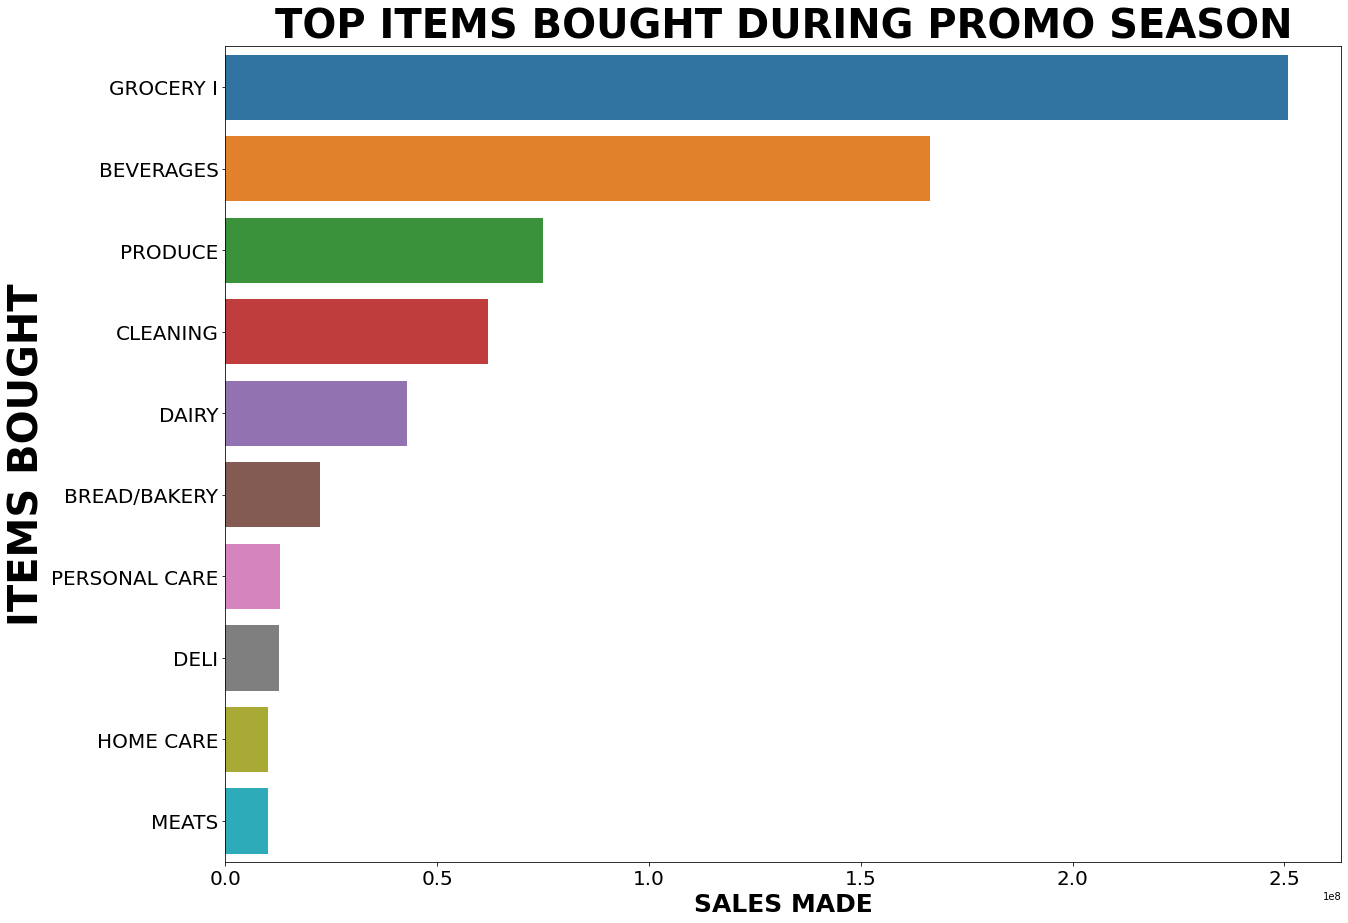

In [71]:
plt.figure(figsize = (20,15))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
sns.barplot(y = topsales_forpromo[:10].index, x = (topsales_forpromo["sum"])[:10])
plt.ylabel("ITEMS BOUGHT",fontsize = 40,fontweight = 'bold')
plt.xlabel("SALES MADE",fontsize = 25,fontweight = 'bold')
plt.title("TOP ITEMS BOUGHT DURING PROMO SEASON",fontsize = 40,fontweight = 'bold')

In [72]:
top_stores = Sample2 .groupby(by = "store_nbr").sales.agg(["sum"]).sort_values(by = ["sum"], 
                                                                                       ascending = False)
top_stores.head()

sum
store_nbr            
44        39451484.89
45        35966312.30
47        34107293.42
3         32809535.67
49        29551362.31

In [73]:
top10_stores_df = top_stores.iloc[:10]
top10_stores_df

sum
store_nbr            
44        39451484.89
45        35966312.30
47        34107293.42
3         32809535.67
49        29551362.31
46        28156725.53
48        24303637.49
51        19770561.24
8         19551000.88
50        18987352.27

<AxesSubplot:title={'center':'STORES WITH THE HIGHEST SALES DURING PROMO'}, xlabel='STORES', ylabel='SALES MADE'>

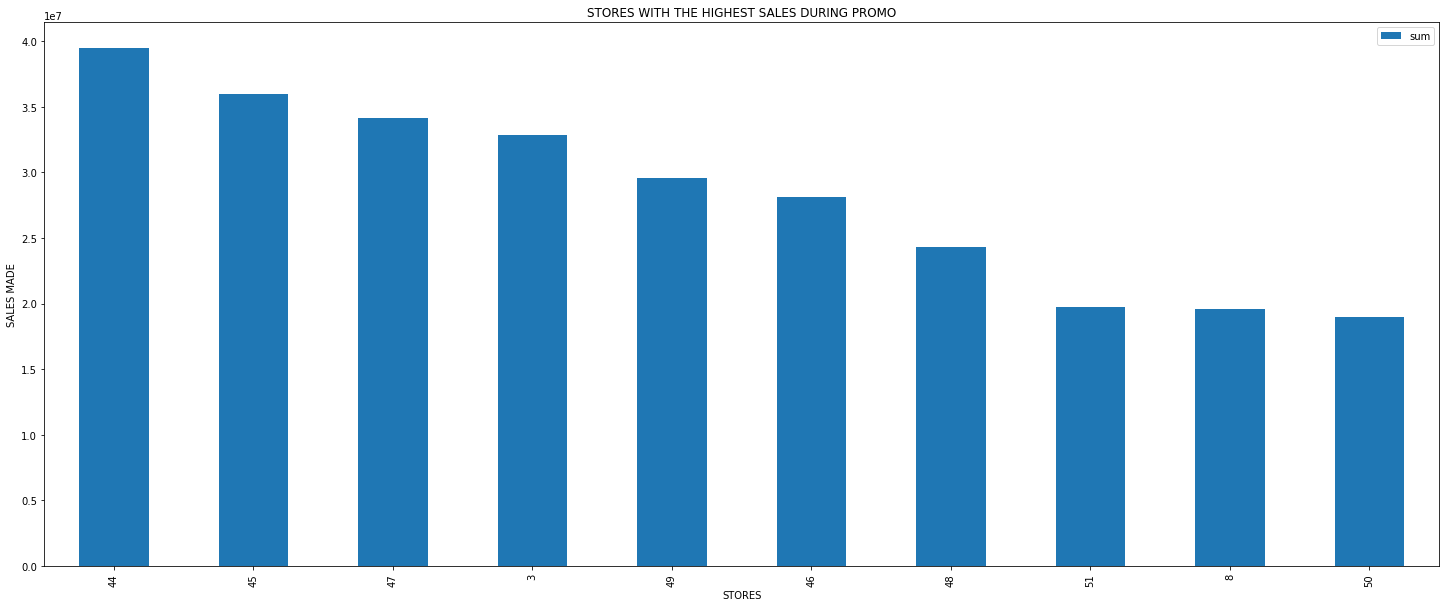

In [74]:
top10_stores_df .plot(kind='bar', title='STORES WITH THE HIGHEST SALES DURING PROMO', 
                              ylabel='SALES MADE',
         xlabel='STORES', figsize=(25, 10))

### QUESTION 2 : 2.Does the Location of a store influence its sales.

In [75]:
merged_data['City']='NaN'
merged_data

store_nbr                      family  sales  onpromotion  Sales_date  \
0             1                  AUTOMOTIVE   0.00         0.00  2013-01-01   
1             1                   BABY CARE   0.00         0.00  2013-01-01   
2             1                      BEAUTY   0.00         0.00  2013-01-01   
3             1                   BEVERAGES   0.00         0.00  2013-01-01   
4             1                       BOOKS   0.00         0.00  2013-01-01   
...         ...                         ...    ...          ...         ...   
7123          9                     POULTRY   0.00         0.00  2013-12-25   
7124          9              PREPARED FOODS   0.00         0.00  2013-12-25   
7125          9                     PRODUCE   0.00         0.00  2013-12-25   
7126          9  SCHOOL AND OFFICE SUPPLIES   0.00         0.00  2013-12-25   
7127          9                     SEAFOOD   0.00         0.00  2013-12-25   

     City  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  
...   ...  
7123  NaN  
7124  NaN  
7125  NaN  
7126  NaN  
7127  NaN  

[3008016 rows x 6 columns]

In [76]:
merged_data["City"] = merged_data['store_nbr'].map({54: 'El Carmen',53: 'Manta',52: 'Manta',51: 'Guayaquil', 50: 'Ambato',
                                              49:'Quito', 48: 'Quito',47: 'Quito', 46: 'Quito', 45: 'Quito', 45: 'Quito',
                                             44:'Quito', 43:'Esmeraldas', 42:'Cuenca', 41:'Machala', 40:'Machala', 39:'Cuenca',
                                             38:'Loja', 37:'Cuenca',36:'Libertad', 35: 'Playas', 34:'Guayaquil', 33:'Quevedo',
                                              32:'Guayaquil', 31:'Babahoyo', 30:'Guayaquil', 29:'Guayaquil', 28:'Guayaquil',
                                              27:'Daule', 26:'Guayaquil',25:'Salinas', 24:'Guayaquil', 23:'Ambato', 22:'Puyo',
                                             21:'Santo Domingo', 20:'Quito', 19:'Guaranda', 18:'Quito', 17:'Quito', 16:'Santo Domingo',
                                             15:'Ibarra', 14:'Riobamba', 13:'Latacunga',12:'Latacunga', 11:'Cayambe', 10:'Quito',9:'Quito',
                                             8:'Quito',7:'Quito',6:'Quito',5:'Santo Domingo',4:'Quito', 3:'Quito', 2:'Quito', 1:'Quito'})
merged_data

store_nbr                      family  sales  onpromotion  Sales_date  \
0             1                  AUTOMOTIVE   0.00         0.00  2013-01-01   
1             1                   BABY CARE   0.00         0.00  2013-01-01   
2             1                      BEAUTY   0.00         0.00  2013-01-01   
3             1                   BEVERAGES   0.00         0.00  2013-01-01   
4             1                       BOOKS   0.00         0.00  2013-01-01   
...         ...                         ...    ...          ...         ...   
7123          9                     POULTRY   0.00         0.00  2013-12-25   
7124          9              PREPARED FOODS   0.00         0.00  2013-12-25   
7125          9                     PRODUCE   0.00         0.00  2013-12-25   
7126          9  SCHOOL AND OFFICE SUPPLIES   0.00         0.00  2013-12-25   
7127          9                     SEAFOOD   0.00         0.00  2013-12-25   

       City  
0     Quito  
1     Quito  
2     Quito  
3     Quito  
4     Quito  
...     ...  
7123  Quito  
7124  Quito  
7125  Quito  
7126  Quito  
7127  Quito  

[3008016 rows x 6 columns]

In [77]:
sales_by_cites = merged_data.groupby(by = "City").sales.agg(["sum"]).sort_values(by = ["sum"], 
                                                                                       ascending = False)
sales_by_cites

sum
City                      
Quito         556741836.83
Guayaquil     122967260.48
Cuenca         49168596.03
Ambato         40304401.30
Santo Domingo  35834323.04
Machala        33386796.54
Cayambe        28325558.48
Latacunga      21182263.78
Daule          19188021.38
Loja           18859999.26
Babahoyo       17746872.70
Esmeraldas     16391692.21
Libertad       15322431.10
Quevedo        14178501.29
Manta          13912337.02
Guaranda       13049509.84
Ibarra         11451270.02
Salinas        11420997.87
Riobamba       11387918.75
El Carmen      11057483.12
Playas          7676679.42
Puyo            4090201.74

In [78]:
###FINDING THE TOP TEN CITIES WITH THE MOST SALES

topsales_by_cites= sales_by_cites.iloc[:10]
topsales_by_cites


sum
City                      
Quito         556741836.83
Guayaquil     122967260.48
Cuenca         49168596.03
Ambato         40304401.30
Santo Domingo  35834323.04
Machala        33386796.54
Cayambe        28325558.48
Latacunga      21182263.78
Daule          19188021.38
Loja           18859999.26

Text(0.5, 1.0, 'CITIES WITH THE MOST SALES')

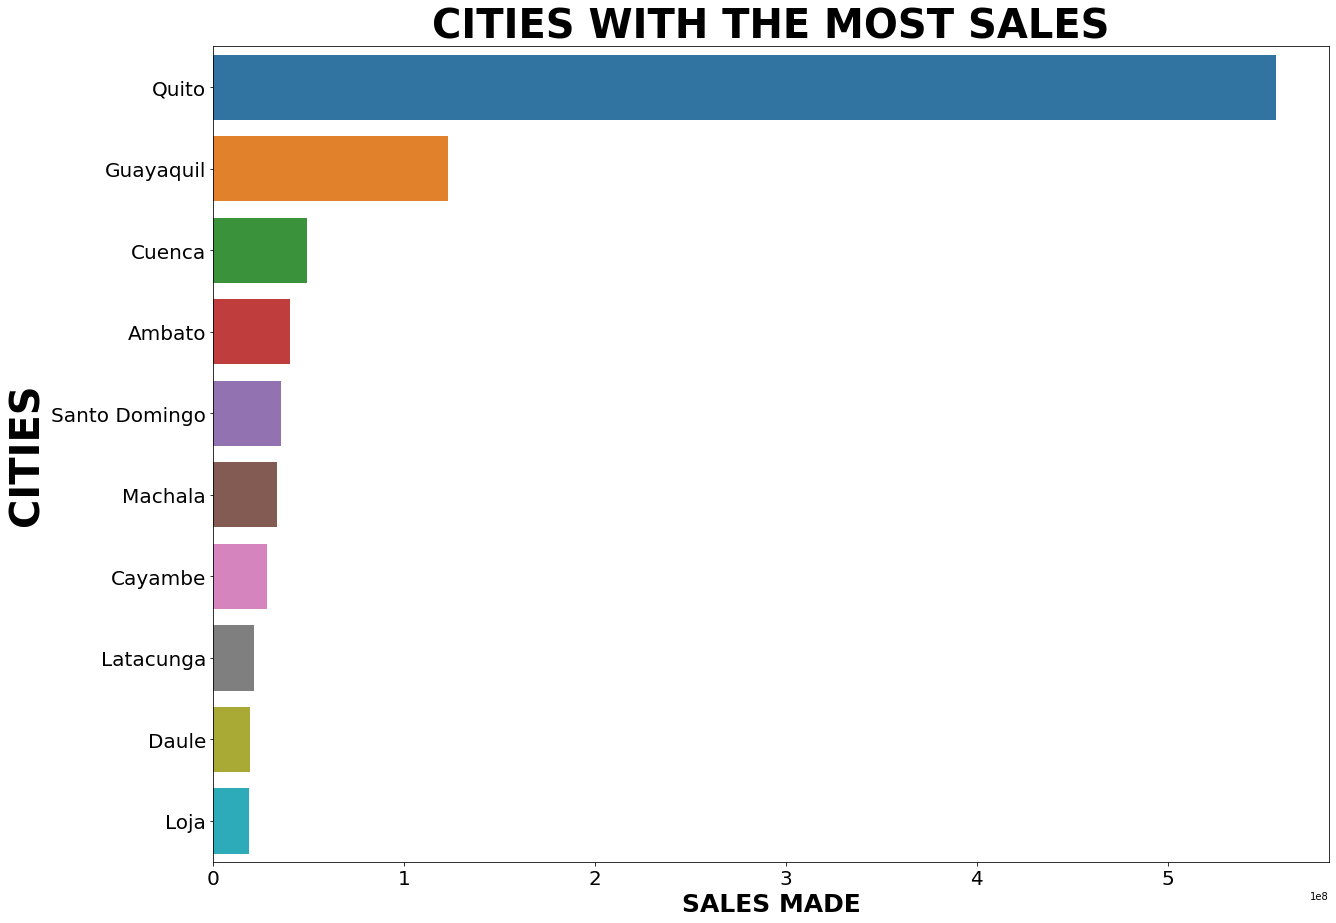

In [79]:
plt.figure(figsize = (20,15))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
sns.barplot(y = topsales_by_cites[:10].index, x = (topsales_by_cites["sum"])[:10])
plt.ylabel("CITIES",fontsize = 40,fontweight = 'bold')
plt.xlabel("SALES MADE",fontsize = 25,fontweight = 'bold')
plt.title("CITIES WITH THE MOST SALES",fontsize = 40,fontweight = 'bold')

Guayaquil is the most populated then comes Quito whilst Cuenca is the richest city in Ecudor but 
Quito has the most sales probably because it has the most number of stores hence corporation favorita could
increase the number of stores especially in Guayaquil which is the most populated and Cuenca which is the richest city in the country to increase accessibility and hence sales.
In conclusion I think the location infleunces the sales of Corporation Favorita but accessibity influences it more

### Question 3 : Are sales affected by promotions, oil prices and holidays?

### Is sales inflenced by oil prices?

In [80]:
merged_data2.head()

store_nbr      family  sales  onpromotion  Sales_date  dcoilwtico
0          1  AUTOMOTIVE   0.00         0.00  2013-01-01       93.14
1          1   BABY CARE   0.00         0.00  2013-01-01       93.14
2          1      BEAUTY   0.00         0.00  2013-01-01       93.14
3          1   BEVERAGES   0.00         0.00  2013-01-01       93.14
4          1       BOOKS   0.00         0.00  2013-01-01       93.14

In [81]:
merged_data2.dcoilwtico.unique()

array([ 93.14,  92.97,  93.12,  47.26,  93.2 ,  93.21,  93.08,  93.81,
        93.6 ,  94.27,  93.26,  94.28,  95.49,  95.61,  96.09,  95.06,
        95.35,  95.15,  95.95,  97.62,  97.98,  97.65,  97.46,  96.21,
        96.68,  96.44,  95.84,  95.71,  97.01,  97.48,  97.03,  97.3 ,
        96.69,  94.92,  92.79,  92.74,  92.63,  92.84,  92.03,  90.71,
        90.13,  90.88,  90.47,  91.53,  92.01,  92.07,  92.44,  92.47,
        93.03,  93.49,  93.71,  92.46,  93.41,  94.55,  95.99,  96.53,
        97.24,  97.1 ,  97.23,  95.02,  92.76,  93.36,  94.18,  94.59,
        93.44,  91.23,  88.75,  88.73,  86.65,  87.83,  88.04,  88.81,
        89.21,  91.07,  93.27,  94.09,  93.22,  90.74,  93.7 ,  95.25,
        95.8 ,  95.28,  96.24,  95.81,  94.76,  93.96,  93.95,  94.85,
        95.72,  96.29,  95.55,  93.98,  94.12,  93.84,  94.65,  93.13,
        93.57,  91.93,  93.66,  94.71,  96.11,  95.82,  95.5 ,  95.98,
        96.66,  97.83,  97.86,  98.46,  98.24,  94.89,  95.07,  95.47,
      

Text(0.5, 1.0, 'OIL PRICES AND SALES')

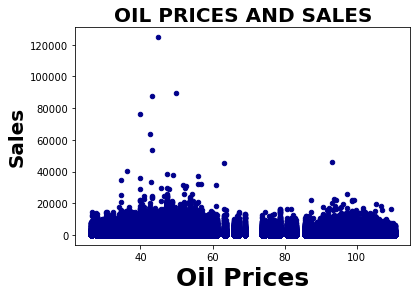

In [82]:
ax1 = merged_data2.plot.scatter(x="dcoilwtico", y="sales", c='darkblue')
plt.ylabel("Sales",fontsize = 20,fontweight = 'bold')
plt.xlabel("Oil Prices",fontsize = 25,fontweight = 'bold')
plt.title("OIL PRICES AND SALES",fontsize = 20,fontweight = 'bold')


### From the diagram above, low oil prices increses sales, whilst high oil prices decreases
### in corporation favorita 

### Is sales affected by promotions?

In [83]:
merged_data2.head()

store_nbr      family  sales  onpromotion  Sales_date  dcoilwtico
0          1  AUTOMOTIVE   0.00         0.00  2013-01-01       93.14
1          1   BABY CARE   0.00         0.00  2013-01-01       93.14
2          1      BEAUTY   0.00         0.00  2013-01-01       93.14
3          1   BEVERAGES   0.00         0.00  2013-01-01       93.14
4          1       BOOKS   0.00         0.00  2013-01-01       93.14

In [84]:
merged_data['PROMO/NOPROMO']='NaN'
merged_data

store_nbr                      family  sales  onpromotion  Sales_date  \
0             1                  AUTOMOTIVE   0.00         0.00  2013-01-01   
1             1                   BABY CARE   0.00         0.00  2013-01-01   
2             1                      BEAUTY   0.00         0.00  2013-01-01   
3             1                   BEVERAGES   0.00         0.00  2013-01-01   
4             1                       BOOKS   0.00         0.00  2013-01-01   
...         ...                         ...    ...          ...         ...   
7123          9                     POULTRY   0.00         0.00  2013-12-25   
7124          9              PREPARED FOODS   0.00         0.00  2013-12-25   
7125          9                     PRODUCE   0.00         0.00  2013-12-25   
7126          9  SCHOOL AND OFFICE SUPPLIES   0.00         0.00  2013-12-25   
7127          9                     SEAFOOD   0.00         0.00  2013-12-25   

       City PROMO/NOPROMO  
0     Quito           NaN  
1     Quito           NaN  
2     Quito           NaN  
3     Quito           NaN  
4     Quito           NaN  
...     ...           ...  
7123  Quito           NaN  
7124  Quito           NaN  
7125  Quito           NaN  
7126  Quito           NaN  
7127  Quito           NaN  

[3008016 rows x 7 columns]

In [85]:
merged_data["PROMO/NOPROMO"] = merged_data['onpromotion'].map(
                           {0:'No Promo'})
merged_data

store_nbr                      family  sales  onpromotion  Sales_date  \
0             1                  AUTOMOTIVE   0.00         0.00  2013-01-01   
1             1                   BABY CARE   0.00         0.00  2013-01-01   
2             1                      BEAUTY   0.00         0.00  2013-01-01   
3             1                   BEVERAGES   0.00         0.00  2013-01-01   
4             1                       BOOKS   0.00         0.00  2013-01-01   
...         ...                         ...    ...          ...         ...   
7123          9                     POULTRY   0.00         0.00  2013-12-25   
7124          9              PREPARED FOODS   0.00         0.00  2013-12-25   
7125          9                     PRODUCE   0.00         0.00  2013-12-25   
7126          9  SCHOOL AND OFFICE SUPPLIES   0.00         0.00  2013-12-25   
7127          9                     SEAFOOD   0.00         0.00  2013-12-25   

       City PROMO/NOPROMO  
0     Quito      No Promo  
1     Quito      No Promo  
2     Quito      No Promo  
3     Quito      No Promo  
4     Quito      No Promo  
...     ...           ...  
7123  Quito      No Promo  
7124  Quito      No Promo  
7125  Quito      No Promo  
7126  Quito      No Promo  
7127  Quito      No Promo  

[3008016 rows x 7 columns]

In [86]:
merged_data["PROMO/NOPROMO"].replace(np.NAN ,value='Promo', inplace=True)
merged_data 

store_nbr                      family  sales  onpromotion  Sales_date  \
0             1                  AUTOMOTIVE   0.00         0.00  2013-01-01   
1             1                   BABY CARE   0.00         0.00  2013-01-01   
2             1                      BEAUTY   0.00         0.00  2013-01-01   
3             1                   BEVERAGES   0.00         0.00  2013-01-01   
4             1                       BOOKS   0.00         0.00  2013-01-01   
...         ...                         ...    ...          ...         ...   
7123          9                     POULTRY   0.00         0.00  2013-12-25   
7124          9              PREPARED FOODS   0.00         0.00  2013-12-25   
7125          9                     PRODUCE   0.00         0.00  2013-12-25   
7126          9  SCHOOL AND OFFICE SUPPLIES   0.00         0.00  2013-12-25   
7127          9                     SEAFOOD   0.00         0.00  2013-12-25   

       City PROMO/NOPROMO  
0     Quito      No Promo  
1     Quito      No Promo  
2     Quito      No Promo  
3     Quito      No Promo  
4     Quito      No Promo  
...     ...           ...  
7123  Quito      No Promo  
7124  Quito      No Promo  
7125  Quito      No Promo  
7126  Quito      No Promo  
7127  Quito      No Promo  

[3008016 rows x 7 columns]

In [87]:
merged_data 

store_nbr                      family  sales  onpromotion  Sales_date  \
0             1                  AUTOMOTIVE   0.00         0.00  2013-01-01   
1             1                   BABY CARE   0.00         0.00  2013-01-01   
2             1                      BEAUTY   0.00         0.00  2013-01-01   
3             1                   BEVERAGES   0.00         0.00  2013-01-01   
4             1                       BOOKS   0.00         0.00  2013-01-01   
...         ...                         ...    ...          ...         ...   
7123          9                     POULTRY   0.00         0.00  2013-12-25   
7124          9              PREPARED FOODS   0.00         0.00  2013-12-25   
7125          9                     PRODUCE   0.00         0.00  2013-12-25   
7126          9  SCHOOL AND OFFICE SUPPLIES   0.00         0.00  2013-12-25   
7127          9                     SEAFOOD   0.00         0.00  2013-12-25   

       City PROMO/NOPROMO  
0     Quito      No Promo  
1     Quito      No Promo  
2     Quito      No Promo  
3     Quito      No Promo  
4     Quito      No Promo  
...     ...           ...  
7123  Quito      No Promo  
7124  Quito      No Promo  
7125  Quito      No Promo  
7126  Quito      No Promo  
7127  Quito      No Promo  

[3008016 rows x 7 columns]

In [88]:
sales_onpromo = merged_data.groupby(by = 'PROMO/NOPROMO').sales.agg(
    ["sum"]).sort_values(by = ["sum"], ascending = False)
sales_onpromo

sum
PROMO/NOPROMO             
Promo         695505170.46
No Promo      378139781.74

Text(0.5, 1.0, 'SALES WITH AND WITHOUT PROMO')

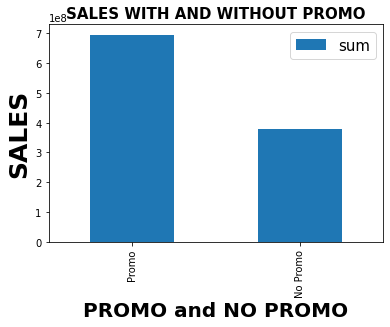

In [89]:
sales_onpromo.plot(kind ='bar')
plt.ylabel("SALES",fontsize = 25,fontweight = 'bold')
plt.xlabel("PROMO and NO PROMO",fontsize = 20,fontweight = 'bold')
plt.legend(bbox_to_anchor =(1,1),fontsize = 15)
plt.title("SALES WITH AND WITHOUT PROMO",fontsize = 15,fontweight = 'bold')

#### finding the holiday type that greatly influence sales

In [90]:
Holidays

date        type    locale locale_name  \
0    2012-03-02     Holiday     Local       Manta   
1    2012-04-01     Holiday  Regional    Cotopaxi   
2    2012-04-12     Holiday     Local      Cuenca   
3    2012-04-14     Holiday     Local    Libertad   
4    2012-04-21     Holiday     Local    Riobamba   
..          ...         ...       ...         ...   
345  2017-12-22  Additional  National     Ecuador   
346  2017-12-23  Additional  National     Ecuador   
347  2017-12-24  Additional  National     Ecuador   
348  2017-12-25     Holiday  National     Ecuador   
349  2017-12-26  Additional  National     Ecuador   

                       description  transferred  
0               Fundacion de Manta        False  
1    Provincializacion de Cotopaxi        False  
2              Fundacion de Cuenca        False  
3        Cantonizacion de Libertad        False  
4        Cantonizacion de Riobamba        False  
..                             ...          ...  
345                      Navidad-3        False  
346                      Navidad-2        False  
347                      Navidad-1        False  
348                        Navidad        False  
349                      Navidad+1        False  

[350 rows x 6 columns]

Merging Holidays with the stores which had Holidays during that season

In [91]:
Holidays.locale_name.unique()

array(['Manta', 'Cotopaxi', 'Cuenca', 'Libertad', 'Riobamba', 'Puyo',
       'Guaranda', 'Imbabura', 'Latacunga', 'Machala', 'Santo Domingo',
       'El Carmen', 'Cayambe', 'Esmeraldas', 'Ecuador', 'Ambato',
       'Ibarra', 'Quevedo', 'Santo Domingo de los Tsachilas',
       'Santa Elena', 'Quito', 'Loja', 'Salinas', 'Guayaquil'],
      dtype=object)

In [92]:
lst = ['Ecuador', 'Ecuador', 'Ecuador','Ecuador','Ecuador','Ecuador','Ecuador','Ecuador','Ecuador','Ecuador',
       'Ecuador','Ecuador','Ecuador','Ecuador','Ecuador','Ecuador','Ecuador','Ecuador','Ecuador','Ecuador','Ecuador',
      'Ecuador','Ecuador','Ecuador','Ecuador','Ecuador','Ecuador','Ecuador','Ecuador','Ecuador','Ecuador','Ecuador',
      'Ecuador','Ecuador','Ecuador','Ecuador','Ecuador','Ecuador','Ecuador','Ecuador','Ecuador','Ecuador','Ecuador',
      'Ecuador','Ecuador','Ecuador','Ecuador','Ecuador','Ecuador','Ecuador','Ecuador','Ecuador','Ecuador','Ecuador',
    'Manta','Manta','Cuenca','Cuenca','Cuenca','Quito','Quito','Quito','Quito','Quito','Quito','Quito','Quito','Quito',
      'Quito','Quito','Quito','Quito','Quito','Quito','Quito','Quito','Quito','Guayaquil','Guayaquil','Guayaquil',
      'Guayaquil','Guayaquil','Guayaquil','Guayaquil','Guayaquil','Santo Domingo','Santo Domingo','Santo Domingo',
      'Loja','Salinas','Santa Elena','Libertad','Cotopaxi','Cotopaxi','Latacunga','Latacunga','Riobamba','Puyo',
      'Guaranda','Imbabura','Ibarra','Machala','Machala','Santo Domingo de los Tsachilas','Santo Domingo de los Tsachilas'
      'Santo Domingo de los Tsachilas','El Carmen','Esmeraldas','Cayambe','Ambato','Quevedo']
lst2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,
       39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,52,53,37,39,42,1,2,3,4,6,7,8,9,10,17,18,20,44,45,46,47,48,49,
       24,26,28,29,30,32,34,51,5,16,21,38,25,25,36,12,13,12,13,14,22,19,15,15,40,41,5,16,21,54,43,11,50,33,]
  
Fill_locale= pd.DataFrame(list(zip(lst, lst2)),
               columns =['locale_name', 'stores'])
Fill_locale.head()

locale_name  stores
0     Ecuador       1
1     Ecuador       2
2     Ecuador       3
3     Ecuador       4
4     Ecuador       5

In [93]:
Holidays_data =Holidays.merge(Fill_locale, how='left', on='locale_name')
Holidays_data

date        type    locale locale_name  \
0     2012-03-02     Holiday     Local       Manta   
1     2012-03-02     Holiday     Local       Manta   
2     2012-04-01     Holiday  Regional    Cotopaxi   
3     2012-04-01     Holiday  Regional    Cotopaxi   
4     2012-04-12     Holiday     Local      Cuenca   
...          ...         ...       ...         ...   
9921  2017-12-26  Additional  National     Ecuador   
9922  2017-12-26  Additional  National     Ecuador   
9923  2017-12-26  Additional  National     Ecuador   
9924  2017-12-26  Additional  National     Ecuador   
9925  2017-12-26  Additional  National     Ecuador   

                        description  transferred  stores  
0                Fundacion de Manta        False      52  
1                Fundacion de Manta        False      53  
2     Provincializacion de Cotopaxi        False      12  
3     Provincializacion de Cotopaxi        False      13  
4               Fundacion de Cuenca        False      37  
...                             ...          ...     ...  
9921                      Navidad+1        False      50  
9922                      Navidad+1        False      51  
9923                      Navidad+1        False      52  
9924                      Navidad+1        False      53  
9925                      Navidad+1        False      54  

[9926 rows x 7 columns]

In [94]:
Holidays_data.head()

date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
2  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
3  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
4  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   

   transferred  stores  
0        False      52  
1        False      53  
2        False      12  
3        False      13  
4        False      37

In [95]:

Holidays_data.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
stores         0
dtype: int64

In [96]:
Holidays_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9926 entries, 0 to 9925
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         9926 non-null   object
 1   type         9926 non-null   object
 2   locale       9926 non-null   object
 3   locale_name  9926 non-null   object
 4   description  9926 non-null   object
 5   transferred  9926 non-null   bool  
 6   stores       9926 non-null   int64 
dtypes: bool(1), int64(1), object(5)
memory usage: 552.5+ KB


In [97]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3008016 entries, 0 to 7127
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   store_nbr      int64  
 1   family         object 
 2   sales          float64
 3   onpromotion    float64
 4   Sales_date     object 
 5   City           object 
 6   PROMO/NOPROMO  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 183.6+ MB


In [98]:
merged_data

store_nbr                      family  sales  onpromotion  Sales_date  \
0             1                  AUTOMOTIVE   0.00         0.00  2013-01-01   
1             1                   BABY CARE   0.00         0.00  2013-01-01   
2             1                      BEAUTY   0.00         0.00  2013-01-01   
3             1                   BEVERAGES   0.00         0.00  2013-01-01   
4             1                       BOOKS   0.00         0.00  2013-01-01   
...         ...                         ...    ...          ...         ...   
7123          9                     POULTRY   0.00         0.00  2013-12-25   
7124          9              PREPARED FOODS   0.00         0.00  2013-12-25   
7125          9                     PRODUCE   0.00         0.00  2013-12-25   
7126          9  SCHOOL AND OFFICE SUPPLIES   0.00         0.00  2013-12-25   
7127          9                     SEAFOOD   0.00         0.00  2013-12-25   

       City PROMO/NOPROMO  
0     Quito      No Promo  
1     Quito      No Promo  
2     Quito      No Promo  
3     Quito      No Promo  
4     Quito      No Promo  
...     ...           ...  
7123  Quito      No Promo  
7124  Quito      No Promo  
7125  Quito      No Promo  
7126  Quito      No Promo  
7127  Quito      No Promo  

[3008016 rows x 7 columns]

In [99]:
Holidays_data['Sales_date']= pd.to_datetime(Holidays_data['date']).dt.date
Holidays_data

date        type    locale locale_name  \
0     2012-03-02     Holiday     Local       Manta   
1     2012-03-02     Holiday     Local       Manta   
2     2012-04-01     Holiday  Regional    Cotopaxi   
3     2012-04-01     Holiday  Regional    Cotopaxi   
4     2012-04-12     Holiday     Local      Cuenca   
...          ...         ...       ...         ...   
9921  2017-12-26  Additional  National     Ecuador   
9922  2017-12-26  Additional  National     Ecuador   
9923  2017-12-26  Additional  National     Ecuador   
9924  2017-12-26  Additional  National     Ecuador   
9925  2017-12-26  Additional  National     Ecuador   

                        description  transferred  stores  Sales_date  
0                Fundacion de Manta        False      52  2012-03-02  
1                Fundacion de Manta        False      53  2012-03-02  
2     Provincializacion de Cotopaxi        False      12  2012-04-01  
3     Provincializacion de Cotopaxi        False      13  2012-04-01  
4               Fundacion de Cuenca        False      37  2012-04-12  
...                             ...          ...     ...         ...  
9921                      Navidad+1        False      50  2017-12-26  
9922                      Navidad+1        False      51  2017-12-26  
9923                      Navidad+1        False      52  2017-12-26  
9924                      Navidad+1        False      53  2017-12-26  
9925                      Navidad+1        False      54  2017-12-26  

[9926 rows x 8 columns]

In [100]:
Holiday_data= pd.merge(merged_data,
          Holidays_data[['locale','locale_name','type','Sales_date','stores']],
                 on= 'Sales_date', 
                       how ='inner')
Holiday_data

store_nbr      family  sales  onpromotion  Sales_date   City  \
0                 1  AUTOMOTIVE   0.00         0.00  2013-01-01  Quito   
1                 1  AUTOMOTIVE   0.00         0.00  2013-01-01  Quito   
2                 1  AUTOMOTIVE   0.00         0.00  2013-01-01  Quito   
3                 1  AUTOMOTIVE   0.00         0.00  2013-01-01  Quito   
4                 1  AUTOMOTIVE   0.00         0.00  2013-01-01  Quito   
...             ...         ...    ...          ...         ...    ...   
15232531          9     SEAFOOD   0.00         0.00  2013-12-25  Quito   
15232532          9     SEAFOOD   0.00         0.00  2013-12-25  Quito   
15232533          9     SEAFOOD   0.00         0.00  2013-12-25  Quito   
15232534          9     SEAFOOD   0.00         0.00  2013-12-25  Quito   
15232535          9     SEAFOOD   0.00         0.00  2013-12-25  Quito   

         PROMO/NOPROMO    locale locale_name     type  stores  
0             No Promo  National     Ecuador  Holiday       1  
1             No Promo  National     Ecuador  Holiday       2  
2             No Promo  National     Ecuador  Holiday       3  
3             No Promo  National     Ecuador  Holiday       4  
4             No Promo  National     Ecuador  Holiday       5  
...                ...       ...         ...      ...     ...  
15232531      No Promo  National     Ecuador  Holiday      50  
15232532      No Promo  National     Ecuador  Holiday      51  
15232533      No Promo  National     Ecuador  Holiday      52  
15232534      No Promo  National     Ecuador  Holiday      53  
15232535      No Promo  National     Ecuador  Holiday      54  

[15232536 rows x 11 columns]

In [101]:
Holiday_data['Sales_date']= Holiday_data['Sales_date'].astype('str')

In [102]:
merged_data['Sales_date']= merged_data['Sales_date'].astype('str')

In [103]:
Holiday_data2= pd.merge(merged_data,
          Holidays_data[['locale','locale_name','type','Sales_date','stores']],
                 on= 'Sales_date', 
                       how ='outer')
Holiday_data2

store_nbr      family  sales  onpromotion  Sales_date   City  \
0             1.00  AUTOMOTIVE   0.00         0.00  2013-01-01  Quito   
1             1.00   BABY CARE   0.00         0.00  2013-01-01  Quito   
2             1.00      BEAUTY   0.00         0.00  2013-01-01  Quito   
3             1.00   BEVERAGES   0.00         0.00  2013-01-01  Quito   
4             1.00       BOOKS   0.00         0.00  2013-01-01  Quito   
...            ...         ...    ...          ...         ...    ...   
3017937        NaN         NaN    NaN          NaN  2017-12-26    NaN   
3017938        NaN         NaN    NaN          NaN  2017-12-26    NaN   
3017939        NaN         NaN    NaN          NaN  2017-12-26    NaN   
3017940        NaN         NaN    NaN          NaN  2017-12-26    NaN   
3017941        NaN         NaN    NaN          NaN  2017-12-26    NaN   

        PROMO/NOPROMO    locale locale_name        type  stores  
0            No Promo       NaN         NaN         NaN     NaN  
1            No Promo       NaN         NaN         NaN     NaN  
2            No Promo       NaN         NaN         NaN     NaN  
3            No Promo       NaN         NaN         NaN     NaN  
4            No Promo       NaN         NaN         NaN     NaN  
...               ...       ...         ...         ...     ...  
3017937           NaN  National     Ecuador  Additional   50.00  
3017938           NaN  National     Ecuador  Additional   51.00  
3017939           NaN  National     Ecuador  Additional   52.00  
3017940           NaN  National     Ecuador  Additional   53.00  
3017941           NaN  National     Ecuador  Additional   54.00  

[3017942 rows x 11 columns]

In [104]:
Holiday_data3= pd.merge(Holidays_data,
                       merged_data[['sales','family','Sales_date']],
                       on= 'Sales_date', 
                       how ='left')

In [105]:
Holiday_data1= pd.merge(Holidays_data,
                       merged_data[['sales','family','Sales_date']],
                       on= 'Sales_date', 
                       how ='left')
Holiday_data1

date        type    locale locale_name  \
0     2012-03-02     Holiday     Local       Manta   
1     2012-03-02     Holiday     Local       Manta   
2     2012-04-01     Holiday  Regional    Cotopaxi   
3     2012-04-01     Holiday  Regional    Cotopaxi   
4     2012-04-12     Holiday     Local      Cuenca   
...          ...         ...       ...         ...   
9921  2017-12-26  Additional  National     Ecuador   
9922  2017-12-26  Additional  National     Ecuador   
9923  2017-12-26  Additional  National     Ecuador   
9924  2017-12-26  Additional  National     Ecuador   
9925  2017-12-26  Additional  National     Ecuador   

                        description  transferred  stores  Sales_date  sales  \
0                Fundacion de Manta        False      52  2012-03-02    NaN   
1                Fundacion de Manta        False      53  2012-03-02    NaN   
2     Provincializacion de Cotopaxi        False      12  2012-04-01    NaN   
3     Provincializacion de Cotopaxi        False      13  2012-04-01    NaN   
4               Fundacion de Cuenca        False      37  2012-04-12    NaN   
...                             ...          ...     ...         ...    ...   
9921                      Navidad+1        False      50  2017-12-26    NaN   
9922                      Navidad+1        False      51  2017-12-26    NaN   
9923                      Navidad+1        False      52  2017-12-26    NaN   
9924                      Navidad+1        False      53  2017-12-26    NaN   
9925                      Navidad+1        False      54  2017-12-26    NaN   

     family  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
...     ...  
9921    NaN  
9922    NaN  
9923    NaN  
9924    NaN  
9925    NaN  

[9926 rows x 10 columns]

In [106]:
Holiday_data.drop(['store_nbr'],axis=1, inplace = True)

In [107]:
Sample = Holiday_data[Holiday_data['family'] == 'AUTOMOTIVE']
Sample

family  sales  onpromotion  Sales_date   City PROMO/NOPROMO  \
0         AUTOMOTIVE   0.00         0.00  2013-01-01  Quito      No Promo   
1         AUTOMOTIVE   0.00         0.00  2013-01-01  Quito      No Promo   
2         AUTOMOTIVE   0.00         0.00  2013-01-01  Quito      No Promo   
3         AUTOMOTIVE   0.00         0.00  2013-01-01  Quito      No Promo   
4         AUTOMOTIVE   0.00         0.00  2013-01-01  Quito      No Promo   
...              ...    ...          ...         ...    ...           ...   
15230803  AUTOMOTIVE   0.00         0.00  2013-12-25  Quito      No Promo   
15230804  AUTOMOTIVE   0.00         0.00  2013-12-25  Quito      No Promo   
15230805  AUTOMOTIVE   0.00         0.00  2013-12-25  Quito      No Promo   
15230806  AUTOMOTIVE   0.00         0.00  2013-12-25  Quito      No Promo   
15230807  AUTOMOTIVE   0.00         0.00  2013-12-25  Quito      No Promo   

            locale locale_name     type  stores  
0         National     Ecuador  Holiday       1  
1         National     Ecuador  Holiday       2  
2         National     Ecuador  Holiday       3  
3         National     Ecuador  Holiday       4  
4         National     Ecuador  Holiday       5  
...            ...         ...      ...     ...  
15230803  National     Ecuador  Holiday      50  
15230804  National     Ecuador  Holiday      51  
15230805  National     Ecuador  Holiday      52  
15230806  National     Ecuador  Holiday      53  
15230807  National     Ecuador  Holiday      54  

[461592 rows x 10 columns]

In [108]:
Sample1= Holiday_data[Holiday_data['locale'] != 'National']
Sample1

family   sales  onpromotion  Sales_date   City  \
481140                    AUTOMOTIVE    1.00         0.00  2013-03-02  Quito   
481141                    AUTOMOTIVE    1.00         0.00  2013-03-02  Quito   
481142                     BABY CARE    0.00         0.00  2013-03-02  Quito   
481143                     BABY CARE    0.00         0.00  2013-03-02  Quito   
481144                        BEAUTY    0.00         0.00  2013-03-02  Quito   
...                              ...     ...          ...         ...    ...   
14847619                     POULTRY  438.13         0.00  2017-08-15  Quito   
14847620              PREPARED FOODS  154.55         1.00  2017-08-15  Quito   
14847621                     PRODUCE 2419.73       148.00  2017-08-15  Quito   
14847622  SCHOOL AND OFFICE SUPPLIES  121.00         8.00  2017-08-15  Quito   
14847623                     SEAFOOD   16.00         0.00  2017-08-15  Quito   

         PROMO/NOPROMO locale locale_name     type  stores  
481140        No Promo  Local       Manta  Holiday      52  
481141        No Promo  Local       Manta  Holiday      53  
481142        No Promo  Local       Manta  Holiday      52  
481143        No Promo  Local       Manta  Holiday      53  
481144        No Promo  Local       Manta  Holiday      52  
...                ...    ...         ...      ...     ...  
14847619      No Promo  Local    Riobamba  Holiday      14  
14847620         Promo  Local    Riobamba  Holiday      14  
14847621         Promo  Local    Riobamba  Holiday      14  
14847622         Promo  Local    Riobamba  Holiday      14  
14847623      No Promo  Local    Riobamba  Holiday      14  

[702108 rows x 10 columns]

In [109]:
#sns.catplot(data=Holiday_data, x="type", y="sales", hue="locale", kind="bar")
#plt.ylabel("SALES",fontsize = 20,fontweight = 'bold')
#plt.xlabel("HOLIDAYS",fontsize = 20,fontweight = 'bold')
#plt.title("SALES DURING HOLIDAYS",fontsize = 25,fontweight = 'bold')

Question4.Which days and months have the lowest and highest sales for each year?

In [110]:
merged_data 

store_nbr                      family  sales  onpromotion  Sales_date  \
0             1                  AUTOMOTIVE   0.00         0.00  2013-01-01   
1             1                   BABY CARE   0.00         0.00  2013-01-01   
2             1                      BEAUTY   0.00         0.00  2013-01-01   
3             1                   BEVERAGES   0.00         0.00  2013-01-01   
4             1                       BOOKS   0.00         0.00  2013-01-01   
...         ...                         ...    ...          ...         ...   
7123          9                     POULTRY   0.00         0.00  2013-12-25   
7124          9              PREPARED FOODS   0.00         0.00  2013-12-25   
7125          9                     PRODUCE   0.00         0.00  2013-12-25   
7126          9  SCHOOL AND OFFICE SUPPLIES   0.00         0.00  2013-12-25   
7127          9                     SEAFOOD   0.00         0.00  2013-12-25   

       City PROMO/NOPROMO  
0     Quito      No Promo  
1     Quito      No Promo  
2     Quito      No Promo  
3     Quito      No Promo  
4     Quito      No Promo  
...     ...           ...  
7123  Quito      No Promo  
7124  Quito      No Promo  
7125  Quito      No Promo  
7126  Quito      No Promo  
7127  Quito      No Promo  

[3008016 rows x 7 columns]

In [111]:
merged_data['Sales_date'] = pd.to_datetime(merged_data['Sales_date'])
df1 = merged_data.set_index('Sales_date')


In [112]:
df1

store_nbr                      family  sales  onpromotion   City  \
Sales_date                                                                     
2013-01-01          1                  AUTOMOTIVE   0.00         0.00  Quito   
2013-01-01          1                   BABY CARE   0.00         0.00  Quito   
2013-01-01          1                      BEAUTY   0.00         0.00  Quito   
2013-01-01          1                   BEVERAGES   0.00         0.00  Quito   
2013-01-01          1                       BOOKS   0.00         0.00  Quito   
...               ...                         ...    ...          ...    ...   
2013-12-25          9                     POULTRY   0.00         0.00  Quito   
2013-12-25          9              PREPARED FOODS   0.00         0.00  Quito   
2013-12-25          9                     PRODUCE   0.00         0.00  Quito   
2013-12-25          9  SCHOOL AND OFFICE SUPPLIES   0.00         0.00  Quito   
2013-12-25          9                     SEAFOOD   0.00         0.00  Quito   

           PROMO/NOPROMO  
Sales_date                
2013-01-01      No Promo  
2013-01-01      No Promo  
2013-01-01      No Promo  
2013-01-01      No Promo  
2013-01-01      No Promo  
...                  ...  
2013-12-25      No Promo  
2013-12-25      No Promo  
2013-12-25      No Promo  
2013-12-25      No Promo  
2013-12-25      No Promo  

[3008016 rows x 6 columns]

In [113]:
!pip install calplot
import calplot


In [114]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3008016 entries, 2013-01-01 to 2013-12-25
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   store_nbr      int64  
 1   family         object 
 2   sales          float64
 3   onpromotion    float64
 4   City           object 
 5   PROMO/NOPROMO  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 160.6+ MB


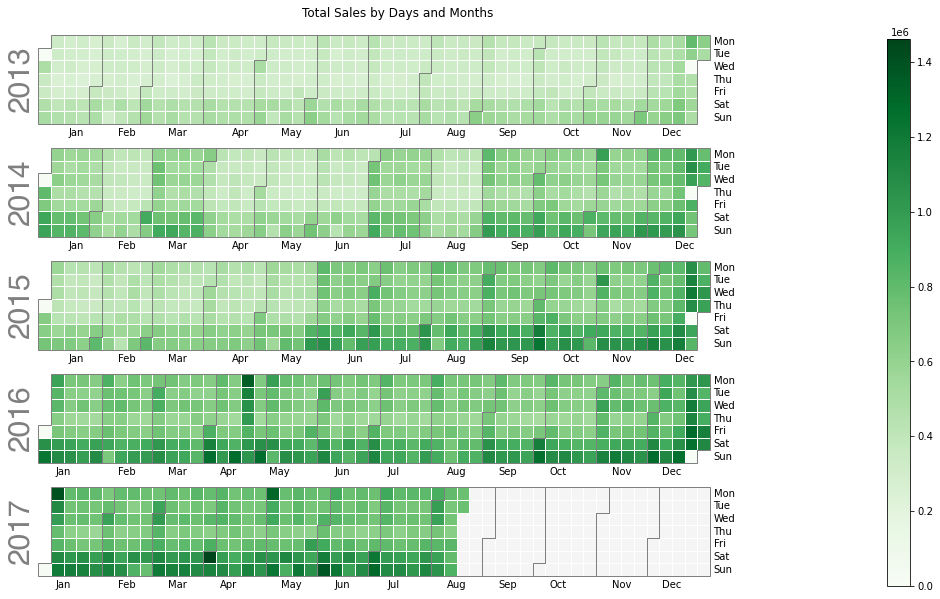

In [115]:
pl1 = calplot.calplot(data = df1['sales'],how = 'sum', cmap = 'Greens', figsize = (16, 8),
                      suptitle = "Total Sales by Days and Months")

From the plot above,the whole time period in the data has been divided into years and years into months. On y-axis, we can see the name of the days and the color gradient shows the amount of sale. Dark colors mean more sales, whereas lighter colors mean less sales.

From the plot,we notice that sales increases as the months goes and December has the most sales. Whiles during the week the Stores makes most of its sales during the weekends and on Mondays.

Question5. Which items sell most notwithstanding promotions or holidays.

In [116]:
merged_data

store_nbr                      family  sales  onpromotion Sales_date  \
0             1                  AUTOMOTIVE   0.00         0.00 2013-01-01   
1             1                   BABY CARE   0.00         0.00 2013-01-01   
2             1                      BEAUTY   0.00         0.00 2013-01-01   
3             1                   BEVERAGES   0.00         0.00 2013-01-01   
4             1                       BOOKS   0.00         0.00 2013-01-01   
...         ...                         ...    ...          ...        ...   
7123          9                     POULTRY   0.00         0.00 2013-12-25   
7124          9              PREPARED FOODS   0.00         0.00 2013-12-25   
7125          9                     PRODUCE   0.00         0.00 2013-12-25   
7126          9  SCHOOL AND OFFICE SUPPLIES   0.00         0.00 2013-12-25   
7127          9                     SEAFOOD   0.00         0.00 2013-12-25   

       City PROMO/NOPROMO  
0     Quito      No Promo  
1     Quito      No Promo  
2     Quito      No Promo  
3     Quito      No Promo  
4     Quito      No Promo  
...     ...           ...  
7123  Quito      No Promo  
7124  Quito      No Promo  
7125  Quito      No Promo  
7126  Quito      No Promo  
7127  Quito      No Promo  

[3008016 rows x 7 columns]

In [117]:
group_by_items = merged_data.groupby(by ='family').sales.agg(
    ["sum"]).sort_values(by = ["sum"], ascending = False)
group_by_items.head()

sum
family                
GROCERY I 343462734.89
BEVERAGES 216954486.00
PRODUCE   122704684.68
CLEANING   97521289.00
DAIRY      64487709.00

Text(0.5, 1.0, 'ITEMS WITH HIGHEST SALES')

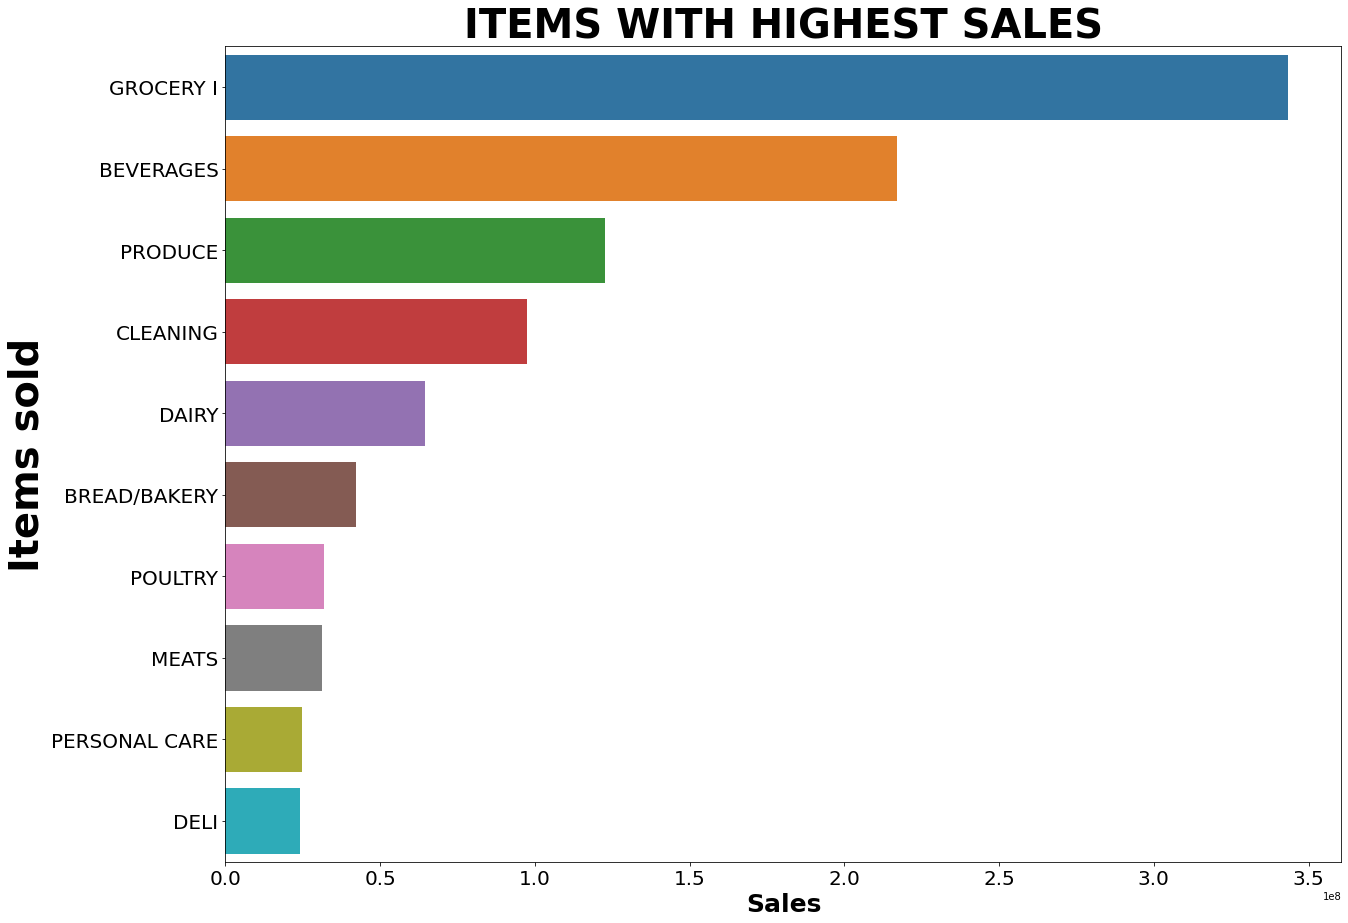

In [118]:
plt.figure(figsize = (20,15))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
sns.barplot(y = group_by_items[:10].index, x = (group_by_items["sum"])[:10])
plt.ylabel("Items sold",fontsize = 40,fontweight = 'bold')
plt.xlabel("Sales",fontsize = 25,fontweight = 'bold')
plt.title("ITEMS WITH HIGHEST SALES",fontsize = 40,fontweight = 'bold')

#### Question6: Does the payment of wages in the public sector on the 15th and last days of the month influence the store sales.


In [119]:
merged_data

store_nbr                      family  sales  onpromotion Sales_date  \
0             1                  AUTOMOTIVE   0.00         0.00 2013-01-01   
1             1                   BABY CARE   0.00         0.00 2013-01-01   
2             1                      BEAUTY   0.00         0.00 2013-01-01   
3             1                   BEVERAGES   0.00         0.00 2013-01-01   
4             1                       BOOKS   0.00         0.00 2013-01-01   
...         ...                         ...    ...          ...        ...   
7123          9                     POULTRY   0.00         0.00 2013-12-25   
7124          9              PREPARED FOODS   0.00         0.00 2013-12-25   
7125          9                     PRODUCE   0.00         0.00 2013-12-25   
7126          9  SCHOOL AND OFFICE SUPPLIES   0.00         0.00 2013-12-25   
7127          9                     SEAFOOD   0.00         0.00 2013-12-25   

       City PROMO/NOPROMO  
0     Quito      No Promo  
1     Quito      No Promo  
2     Quito      No Promo  
3     Quito      No Promo  
4     Quito      No Promo  
...     ...           ...  
7123  Quito      No Promo  
7124  Quito      No Promo  
7125  Quito      No Promo  
7126  Quito      No Promo  
7127  Quito      No Promo  

[3008016 rows x 7 columns]

In [120]:
merged_data['Sales_date'] = pd.to_datetime(merged_data['Sales_date'])
Data1_df= merged_data.groupby(pd.Grouper(freq='7D', key='Sales_date'))['sales'].sum()
Data1_df

Sales_date
2013-01-01   2547693.27
2013-01-08   2330843.40
2013-01-15   2385870.33
2013-01-22   2246413.57
2013-01-29   2535739.22
                ...    
2017-07-18   5742573.97
2017-07-25   5991104.37
2017-08-01   6321801.73
2017-08-08   5348859.28
2017-08-15    762661.94
Freq: 7D, Name: sales, Length: 242, dtype: float64

Text(0.5, 1.0, 'Public Sector Wages and Store Sales')

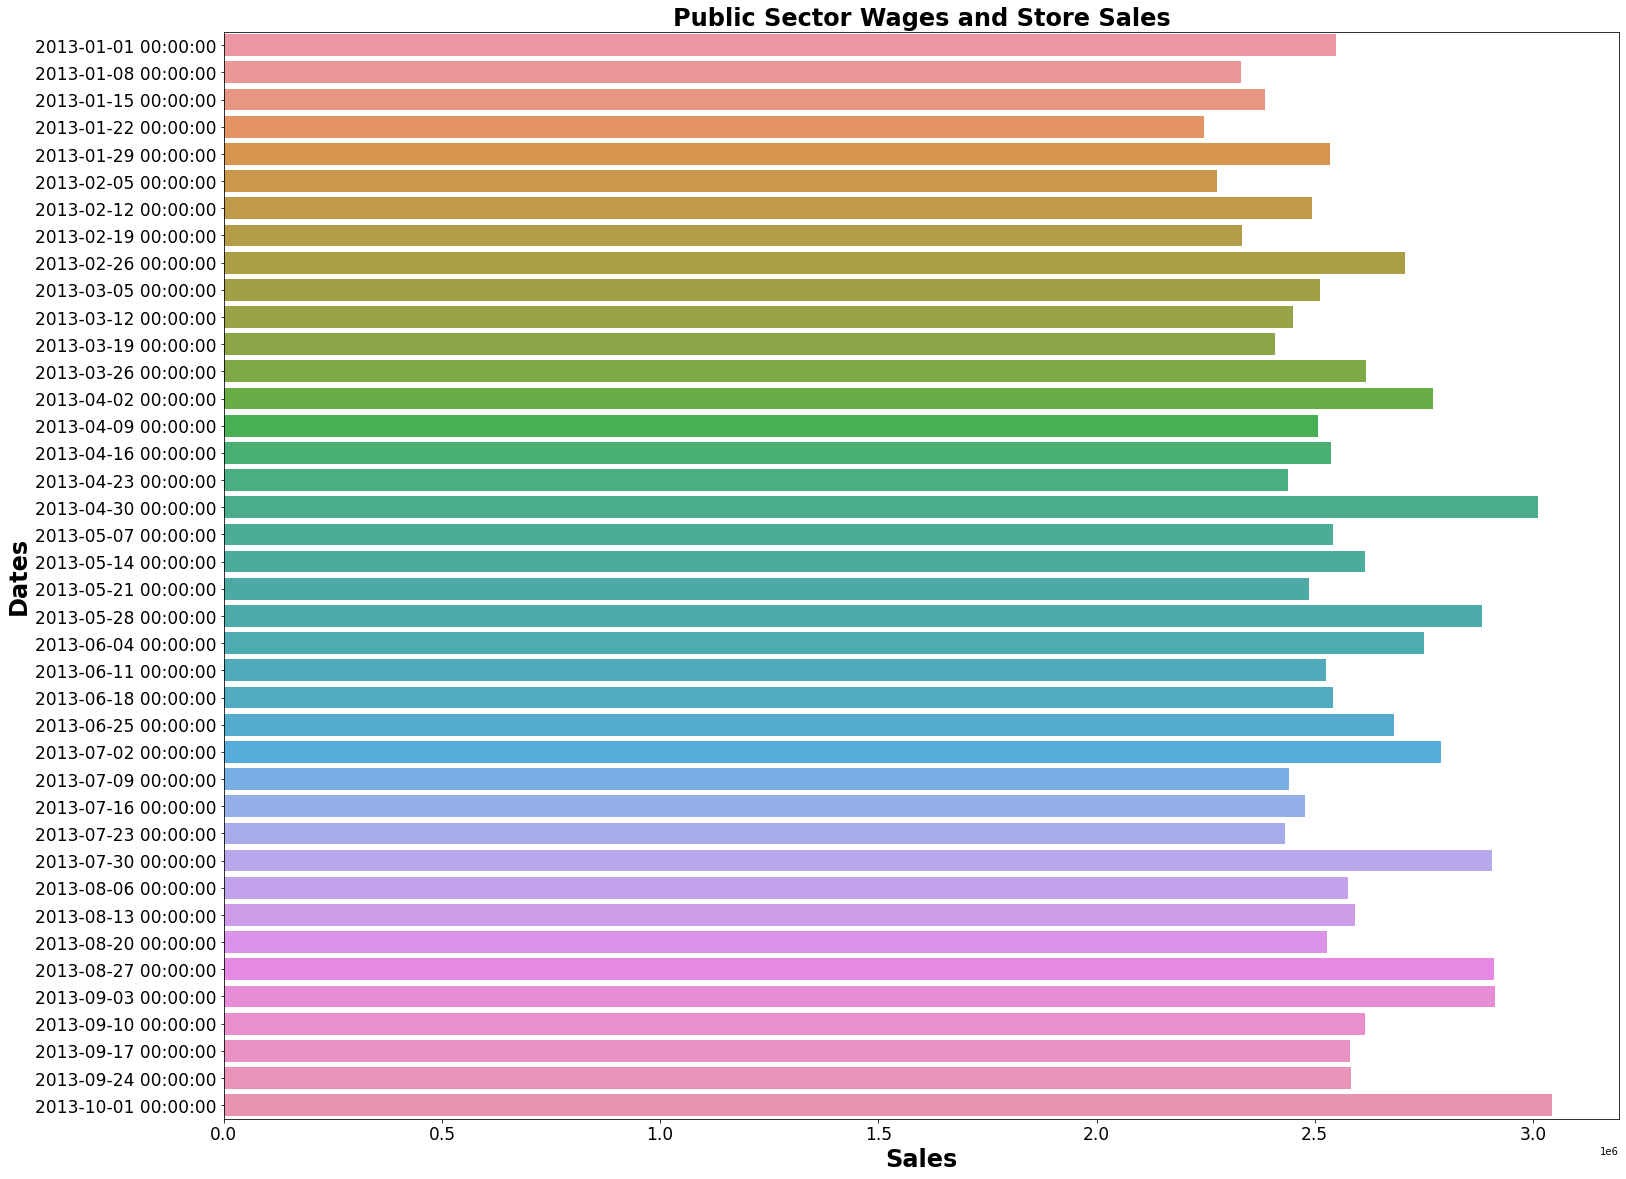

In [121]:
plt.figure(figsize = (25,20))
sns.barplot(y = Data1_df[:40].index, x = Data1_df[:40].values)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.xlabel("Sales", fontsize = 24, fontweight = 'bold')
plt.ylabel("Dates", fontsize = 24, fontweight = 'bold')
plt.title("Public Sector Wages and Store Sales", fontsize = 24, fontweight = 'bold')

From the plot above sales increases at the end of the month through to the beginning of the month but sales although increases during the mid month, does not increase as much as end of the month.In conclusion public sector wages paid during the end of the month increses sales more than the wages paid during every 15th of the month.

Question7. Which stores does payment of public sector wages greatly influence.


In [122]:
merged_data

store_nbr                      family  sales  onpromotion Sales_date  \
0             1                  AUTOMOTIVE   0.00         0.00 2013-01-01   
1             1                   BABY CARE   0.00         0.00 2013-01-01   
2             1                      BEAUTY   0.00         0.00 2013-01-01   
3             1                   BEVERAGES   0.00         0.00 2013-01-01   
4             1                       BOOKS   0.00         0.00 2013-01-01   
...         ...                         ...    ...          ...        ...   
7123          9                     POULTRY   0.00         0.00 2013-12-25   
7124          9              PREPARED FOODS   0.00         0.00 2013-12-25   
7125          9                     PRODUCE   0.00         0.00 2013-12-25   
7126          9  SCHOOL AND OFFICE SUPPLIES   0.00         0.00 2013-12-25   
7127          9                     SEAFOOD   0.00         0.00 2013-12-25   

       City PROMO/NOPROMO  
0     Quito      No Promo  
1     Quito      No Promo  
2     Quito      No Promo  
3     Quito      No Promo  
4     Quito      No Promo  
...     ...           ...  
7123  Quito      No Promo  
7124  Quito      No Promo  
7125  Quito      No Promo  
7126  Quito      No Promo  
7127  Quito      No Promo  

[3008016 rows x 7 columns]

In [123]:
merged_data['Sales_date'] = pd.to_datetime(merged_data['Sales_date'])
Data2= merged_data.groupby(['store_nbr', pd.Grouper(key='Sales_date', freq='7D')])['sales'].sum().reset_index(name='sales')
Data2

store_nbr Sales_date    sales
0              1 2013-01-01 33879.07
1              1 2013-01-08 36470.84
2              1 2013-01-15 36297.25
3              1 2013-01-22 34704.07
4              1 2013-01-29 34844.70
...          ...        ...      ...
13063         54 2017-07-18 70967.38
13064         54 2017-07-25 70782.00
13065         54 2017-08-01 77283.69
13066         54 2017-08-08 73791.21
13067         54 2017-08-15 12666.86

[13068 rows x 3 columns]

<AxesSubplot:xlabel='Sales_date', ylabel='sales'>

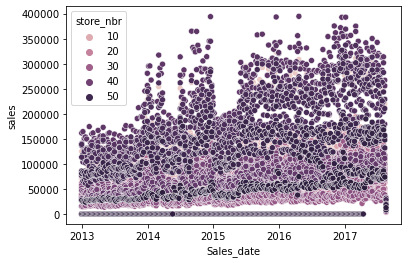

In [124]:
sns.scatterplot(data=Data2, x="Sales_date", y = 'sales',hue= "store_nbr")

### Question8.Which stores sales does holiday seasons greatly influence.

In [125]:
topstores_holidays = Holiday_data.groupby(by = "stores").sales.agg(["sum"]).sort_values(by = ["sum"], 
                                                                                       ascending = False)
topstores_holidays.head()

sum
stores             
13     118438087.22
12     118438087.22
21     116735663.85
24     116197250.36
26     116197250.36

### Hypothesis Testing 2
The earthquake on April 16th did not affect sales in all states of Ecuador.

In [126]:
filtered_df = merged_data.loc[(merged_data['Sales_date'] >= '2016-04-01')&(merged_data['Sales_date'] < '2016-04-30')]
filtered_df                                                                           

store_nbr                      family   sales  onpromotion  \
2108106          1                  AUTOMOTIVE    8.00         0.00   
2108107          1                   BABY CARE    0.00         0.00   
2108108          1                      BEAUTY    2.00         0.00   
2108109          1                   BEVERAGES 2274.00         8.00   
2108110          1                       BOOKS    0.00         0.00   
...            ...                         ...     ...          ...   
2159779          9                     POULTRY  483.56        16.00   
2159780          9              PREPARED FOODS   54.82         1.00   
2159781          9                     PRODUCE 1069.57         1.00   
2159782          9  SCHOOL AND OFFICE SUPPLIES    1.00         0.00   
2159783          9                     SEAFOOD    7.25         0.00   

        Sales_date   City PROMO/NOPROMO  
2108106 2016-04-01  Quito      No Promo  
2108107 2016-04-01  Quito      No Promo  
2108108 2016-04-01  Quito      No Promo  
2108109 2016-04-01  Quito         Promo  
2108110 2016-04-01  Quito      No Promo  
...            ...    ...           ...  
2159779 2016-04-29  Quito         Promo  
2159780 2016-04-29  Quito         Promo  
2159781 2016-04-29  Quito         Promo  
2159782 2016-04-29  Quito      No Promo  
2159783 2016-04-29  Quito      No Promo  

[51678 rows x 7 columns]

Text(0.5, 1.0, 'The Earthquake and Store Sales')

<Figure size 2880x7200 with 0 Axes>

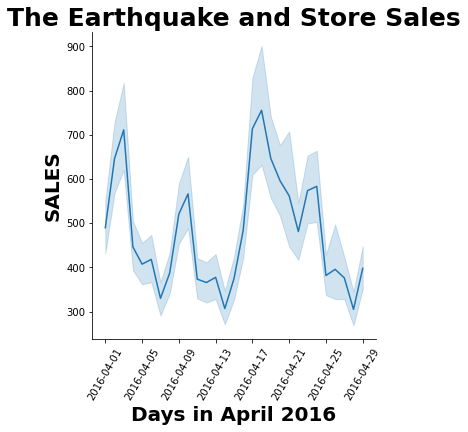

In [127]:
plt.figure(figsize = (40,100))
sns.relplot(data=filtered_df, x="Sales_date", y="sales", kind="line")
plt.xticks(rotation=60);
plt.ylabel("SALES",fontsize = 20,fontweight = 'bold')
plt.xlabel("Days in April 2016",fontsize = 20,fontweight = 'bold')
plt.title("The Earthquake and Store Sales",fontsize = 25,fontweight = 'bold')

## FEATURE EGINERING

In this part, I will be taking care of missing values if any and converting categorical columns to numeric columns and taking care of any other extraneous columns encountered during our analysis.

### Preparing Train Data

In [128]:
Train= pd.merge(Train_Data, Stores)

In [129]:
Train= pd.merge(Train,merged_oildata, on = 'Sales_date')
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
 6   Sales_date   object 
 7   city         object 
 8   state        object 
 9   type         object 
 10  cluster      int64  
 11  dcoilwtico   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 297.6+ MB


In [130]:
Holidays

date        type    locale locale_name  \
0    2012-03-02     Holiday     Local       Manta   
1    2012-04-01     Holiday  Regional    Cotopaxi   
2    2012-04-12     Holiday     Local      Cuenca   
3    2012-04-14     Holiday     Local    Libertad   
4    2012-04-21     Holiday     Local    Riobamba   
..          ...         ...       ...         ...   
345  2017-12-22  Additional  National     Ecuador   
346  2017-12-23  Additional  National     Ecuador   
347  2017-12-24  Additional  National     Ecuador   
348  2017-12-25     Holiday  National     Ecuador   
349  2017-12-26  Additional  National     Ecuador   

                       description  transferred  
0               Fundacion de Manta        False  
1    Provincializacion de Cotopaxi        False  
2              Fundacion de Cuenca        False  
3        Cantonizacion de Libertad        False  
4        Cantonizacion de Riobamba        False  
..                             ...          ...  
345                      Navidad-3        False  
346                      Navidad-2        False  
347                      Navidad-1        False  
348                        Navidad        False  
349                      Navidad+1        False  

[350 rows x 6 columns]

In [131]:
## Number of expected dates
expected_days = pd.date_range(start = Train_Data["Sales_date"].min(), end = Train_Data["Sales_date"].max())
expected_days

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', length=1688, freq='D')

In [132]:
# Getting missing dates
missing_holiday_dates = set(expected_days.date) - set(Holidays["date"].unique())
missing_holiday_dates

{datetime.date(2014, 7, 12),
 datetime.date(2016, 3, 3),
 datetime.date(2014, 11, 8),
 datetime.date(2014, 4, 20),
 datetime.date(2016, 8, 21),
 datetime.date(2017, 3, 26),
 datetime.date(2017, 3, 6),
 datetime.date(2016, 12, 31),
 datetime.date(2013, 7, 11),
 datetime.date(2014, 12, 31),
 datetime.date(2015, 3, 20),
 datetime.date(2014, 11, 22),
 datetime.date(2015, 6, 19),
 datetime.date(2016, 9, 13),
 datetime.date(2013, 5, 16),
 datetime.date(2014, 7, 27),
 datetime.date(2013, 4, 13),
 datetime.date(2017, 7, 26),
 datetime.date(2015, 11, 24),
 datetime.date(2016, 6, 13),
 datetime.date(2017, 8, 3),
 datetime.date(2014, 5, 2),
 datetime.date(2016, 3, 20),
 datetime.date(2017, 7, 25),
 datetime.date(2013, 6, 14),
 datetime.date(2013, 4, 28),
 datetime.date(2013, 9, 4),
 datetime.date(2014, 6, 12),
 datetime.date(2013, 9, 24),
 datetime.date(2013, 6, 30),
 datetime.date(2016, 2, 3),
 datetime.date(2015, 9, 12),
 datetime.date(2013, 2, 18),
 datetime.date(2015, 10, 9),
 datetime.date(2

In [133]:
# Creating a dataframe for the missing dates in the holiday data
holidays_add = pd.DataFrame(missing_holiday_dates, columns = ["date"])
holidays_add


date
0     2014-07-12
1     2016-03-03
2     2014-11-08
3     2014-04-20
4     2016-08-21
...          ...
1683  2016-12-02
1684  2015-10-27
1685  2014-06-19
1686  2017-03-28
1687  2015-08-29

[1688 rows x 1 columns]

In [134]:
Holidays["Sales_date"] = pd.to_datetime(Holidays["date"]).dt.date
Holidays

date        type    locale locale_name  \
0    2012-03-02     Holiday     Local       Manta   
1    2012-04-01     Holiday  Regional    Cotopaxi   
2    2012-04-12     Holiday     Local      Cuenca   
3    2012-04-14     Holiday     Local    Libertad   
4    2012-04-21     Holiday     Local    Riobamba   
..          ...         ...       ...         ...   
345  2017-12-22  Additional  National     Ecuador   
346  2017-12-23  Additional  National     Ecuador   
347  2017-12-24  Additional  National     Ecuador   
348  2017-12-25     Holiday  National     Ecuador   
349  2017-12-26  Additional  National     Ecuador   

                       description  transferred  Sales_date  
0               Fundacion de Manta        False  2012-03-02  
1    Provincializacion de Cotopaxi        False  2012-04-01  
2              Fundacion de Cuenca        False  2012-04-12  
3        Cantonizacion de Libertad        False  2012-04-14  
4        Cantonizacion de Riobamba        False  2012-04-21  
..                             ...          ...         ...  
345                      Navidad-3        False  2017-12-22  
346                      Navidad-2        False  2017-12-23  
347                      Navidad-1        False  2017-12-24  
348                        Navidad        False  2017-12-25  
349                      Navidad+1        False  2017-12-26  

[350 rows x 7 columns]

In [135]:
Holidays.drop(columns = ["date",'description'], inplace = True)
Holidays.head()

type    locale locale_name  transferred  Sales_date
0  Holiday     Local       Manta        False  2012-03-02
1  Holiday  Regional    Cotopaxi        False  2012-04-01
2  Holiday     Local      Cuenca        False  2012-04-12
3  Holiday     Local    Libertad        False  2012-04-14
4  Holiday     Local    Riobamba        False  2012-04-21

In [136]:
Holidays.rename(columns = {"Sales_date":'date'}, inplace = True)
Holidays

type    locale locale_name  transferred        date
0       Holiday     Local       Manta        False  2012-03-02
1       Holiday  Regional    Cotopaxi        False  2012-04-01
2       Holiday     Local      Cuenca        False  2012-04-12
3       Holiday     Local    Libertad        False  2012-04-14
4       Holiday     Local    Riobamba        False  2012-04-21
..          ...       ...         ...          ...         ...
345  Additional  National     Ecuador        False  2017-12-22
346  Additional  National     Ecuador        False  2017-12-23
347  Additional  National     Ecuador        False  2017-12-24
348     Holiday  National     Ecuador        False  2017-12-25
349  Additional  National     Ecuador        False  2017-12-26

[350 rows x 5 columns]

In [137]:
# Adding the  missing oil dates to the main dataframe
Holidays=holidays_add.merge(Holidays ,how='left', on='date')

Holidays

date   type    locale locale_name transferred
0     2014-07-12  Event  National     Ecuador       False
1     2016-03-03    NaN       NaN         NaN         NaN
2     2014-11-08    NaN       NaN         NaN         NaN
3     2014-04-20    NaN       NaN         NaN         NaN
4     2016-08-21    NaN       NaN         NaN         NaN
...          ...    ...       ...         ...         ...
1713  2016-12-02    NaN       NaN         NaN         NaN
1714  2015-10-27    NaN       NaN         NaN         NaN
1715  2014-06-19    NaN       NaN         NaN         NaN
1716  2017-03-28    NaN       NaN         NaN         NaN
1717  2015-08-29    NaN       NaN         NaN         NaN

[1718 rows x 5 columns]

In [138]:
Holidays.rename(columns = {'date':"Sales_date"}, inplace = True)
Holidays

Sales_date   type    locale locale_name transferred
0     2014-07-12  Event  National     Ecuador       False
1     2016-03-03    NaN       NaN         NaN         NaN
2     2014-11-08    NaN       NaN         NaN         NaN
3     2014-04-20    NaN       NaN         NaN         NaN
4     2016-08-21    NaN       NaN         NaN         NaN
...          ...    ...       ...         ...         ...
1713  2016-12-02    NaN       NaN         NaN         NaN
1714  2015-10-27    NaN       NaN         NaN         NaN
1715  2014-06-19    NaN       NaN         NaN         NaN
1716  2017-03-28    NaN       NaN         NaN         NaN
1717  2015-08-29    NaN       NaN         NaN         NaN

[1718 rows x 5 columns]

In [139]:
Train = pd.merge(Train, Holidays, on = "Sales_date")
Train

id        date  store_nbr                      family   sales  \
0              0  2013-01-01          1                  AUTOMOTIVE    0.00   
1              1  2013-01-01          1                   BABY CARE    0.00   
2              2  2013-01-01          1                      BEAUTY    0.00   
3              3  2013-01-01          1                   BEVERAGES    0.00   
4              4  2013-01-01          1                       BOOKS    0.00   
...          ...         ...        ...                         ...     ...   
3054343  3000883  2017-08-15          9                     POULTRY  438.13   
3054344  3000884  2017-08-15          9              PREPARED FOODS  154.55   
3054345  3000885  2017-08-15          9                     PRODUCE 2419.73   
3054346  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES  121.00   
3054347  3000887  2017-08-15          9                     SEAFOOD   16.00   

         onpromotion  Sales_date   city      state type_x  cluster  \
0                  0  2013-01-01  Quito  Pichincha      D       13   
1                  0  2013-01-01  Quito  Pichincha      D       13   
2                  0  2013-01-01  Quito  Pichincha      D       13   
3                  0  2013-01-01  Quito  Pichincha      D       13   
4                  0  2013-01-01  Quito  Pichincha      D       13   
...              ...         ...    ...        ...    ...      ...   
3054343            0  2017-08-15  Quito  Pichincha      B        6   
3054344            1  2017-08-15  Quito  Pichincha      B        6   
3054345          148  2017-08-15  Quito  Pichincha      B        6   
3054346            8  2017-08-15  Quito  Pichincha      B        6   
3054347            0  2017-08-15  Quito  Pichincha      B        6   

         dcoilwtico   type_y    locale locale_name transferred  
0             93.14  Holiday  National     Ecuador       False  
1             93.14  Holiday  National     Ecuador       False  
2             93.14  Holiday  National     Ecuador       False  
3             93.14  Holiday  National     Ecuador       False  
4             93.14  Holiday  National     Ecuador       False  
...             ...      ...       ...         ...         ...  
3054343       47.57  Holiday     Local    Riobamba       False  
3054344       47.57  Holiday     Local    Riobamba       False  
3054345       47.57  Holiday     Local    Riobamba       False  
3054346       47.57  Holiday     Local    Riobamba       False  
3054347       47.57  Holiday     Local    Riobamba       False  

[3054348 rows x 16 columns]

In [146]:
Train.isnull().sum()

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
Sales_date           0
city                 0
state                0
type_x               0
cluster              0
dcoilwtico           0
type_y         2551824
locale         2551824
locale_name    2551824
transferred    2551824
dtype: int64

In [147]:
Train["type_y"] =Train["type_y"].fillna("Work Day")
Train["locale"] =Train["locale"].fillna("National")
Train["locale_name"] = Train["locale_name"].fillna("Ecuador")
Train["transferred"] =Train["transferred"].fillna(False)
Train.isnull().sum()


id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
Sales_date     0
city           0
state          0
type_x         0
cluster        0
dcoilwtico     0
type_y         0
locale         0
locale_name    0
transferred    0
dtype: int64

In [148]:
Train.head()

id        date  store_nbr      family  sales  onpromotion  Sales_date  \
0   0  2013-01-01          1  AUTOMOTIVE   0.00            0  2013-01-01   
1   1  2013-01-01          1   BABY CARE   0.00            0  2013-01-01   
2   2  2013-01-01          1      BEAUTY   0.00            0  2013-01-01   
3   3  2013-01-01          1   BEVERAGES   0.00            0  2013-01-01   
4   4  2013-01-01          1       BOOKS   0.00            0  2013-01-01   

    city      state type_x  cluster  dcoilwtico   type_y    locale  \
0  Quito  Pichincha      D       13       93.14  Holiday  National   
1  Quito  Pichincha      D       13       93.14  Holiday  National   
2  Quito  Pichincha      D       13       93.14  Holiday  National   
3  Quito  Pichincha      D       13       93.14  Holiday  National   
4  Quito  Pichincha      D       13       93.14  Holiday  National   

  locale_name  transferred  
0     Ecuador        False  
1     Ecuador        False  
2     Ecuador        False  
3     Ecuador        False  
4     Ecuador        False

In [149]:
 Transactions.head()

date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922

In [150]:
 Transactions["Sales_date"] = pd.to_datetime( Transactions["date"]).dt.date

In [151]:
Train = pd.merge(Train, Transactions, on = ["Sales_date", "store_nbr"])
Train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2805231 entries, 0 to 2805230
Data columns (total 18 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date_x        object 
 2   store_nbr     int64  
 3   family        object 
 4   sales         float64
 5   onpromotion   int64  
 6   Sales_date    object 
 7   city          object 
 8   state         object 
 9   type_x        object 
 10  cluster       int64  
 11  dcoilwtico    float64
 12  type_y        object 
 13  locale        object 
 14  locale_name   object 
 15  transferred   bool   
 16  date_y        object 
 17  transactions  int64  
dtypes: bool(1), float64(2), int64(5), object(10)
memory usage: 387.9+ MB


In [152]:
Train

id      date_x  store_nbr                      family   sales  \
0            561  2013-01-01         25                  AUTOMOTIVE    0.00   
1            562  2013-01-01         25                   BABY CARE    0.00   
2            563  2013-01-01         25                      BEAUTY    2.00   
3            564  2013-01-01         25                   BEVERAGES  810.00   
4            565  2013-01-01         25                       BOOKS    0.00   
...          ...         ...        ...                         ...     ...   
2805226  3000883  2017-08-15          9                     POULTRY  438.13   
2805227  3000884  2017-08-15          9              PREPARED FOODS  154.55   
2805228  3000885  2017-08-15          9                     PRODUCE 2419.73   
2805229  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES  121.00   
2805230  3000887  2017-08-15          9                     SEAFOOD   16.00   

         onpromotion  Sales_date     city        state type_x  cluster  \
0                  0  2013-01-01  Salinas  Santa Elena      D        1   
1                  0  2013-01-01  Salinas  Santa Elena      D        1   
2                  0  2013-01-01  Salinas  Santa Elena      D        1   
3                  0  2013-01-01  Salinas  Santa Elena      D        1   
4                  0  2013-01-01  Salinas  Santa Elena      D        1   
...              ...         ...      ...          ...    ...      ...   
2805226            0  2017-08-15    Quito    Pichincha      B        6   
2805227            1  2017-08-15    Quito    Pichincha      B        6   
2805228          148  2017-08-15    Quito    Pichincha      B        6   
2805229            8  2017-08-15    Quito    Pichincha      B        6   
2805230            0  2017-08-15    Quito    Pichincha      B        6   

         dcoilwtico   type_y    locale locale_name  transferred      date_y  \
0             93.14  Holiday  National     Ecuador        False  2013-01-01   
1             93.14  Holiday  National     Ecuador        False  2013-01-01   
2             93.14  Holiday  National     Ecuador        False  2013-01-01   
3             93.14  Holiday  National     Ecuador        False  2013-01-01   
4             93.14  Holiday  National     Ecuador        False  2013-01-01   
...             ...      ...       ...         ...          ...         ...   
2805226       47.57  Holiday     Local    Riobamba        False  2017-08-15   
2805227       47.57  Holiday     Local    Riobamba        False  2017-08-15   
2805228       47.57  Holiday     Local    Riobamba        False  2017-08-15   
2805229       47.57  Holiday     Local    Riobamba        False  2017-08-15   
2805230       47.57  Holiday     Local    Riobamba        False  2017-08-15   

         transactions  
0                 770  
1                 770  
2                 770  
3                 770  
4                 770  
...               ...  
2805226          2155  
2805227          2155  
2805228          2155  
2805229          2155  
2805230          2155  

[2805231 rows x 18 columns]

In [153]:
Train.corr()

id  store_nbr  sales  onpromotion  cluster  dcoilwtico  \
id            1.00       0.02   0.07         0.20    -0.02       -0.65   
store_nbr     0.02       1.00   0.06         0.02    -0.08       -0.01   
sales         0.07       0.06   1.00         0.43     0.04       -0.07   
onpromotion   0.20       0.02   0.43         1.00     0.00       -0.12   
cluster      -0.02      -0.08   0.04         0.00     1.00        0.01   
dcoilwtico   -0.65      -0.01  -0.07        -0.12     0.01        1.00   
transferred   0.05       0.00  -0.00         0.02    -0.00       -0.01   
transactions -0.03       0.19   0.21         0.03     0.20       -0.04   

              transferred  transactions  
id                   0.05         -0.03  
store_nbr            0.00          0.19  
sales               -0.00          0.21  
onpromotion          0.02          0.03  
cluster             -0.00          0.20  
dcoilwtico          -0.01         -0.04  
transferred          1.00         -0.01  
transactions        -0.01          1.00

<AxesSubplot:>

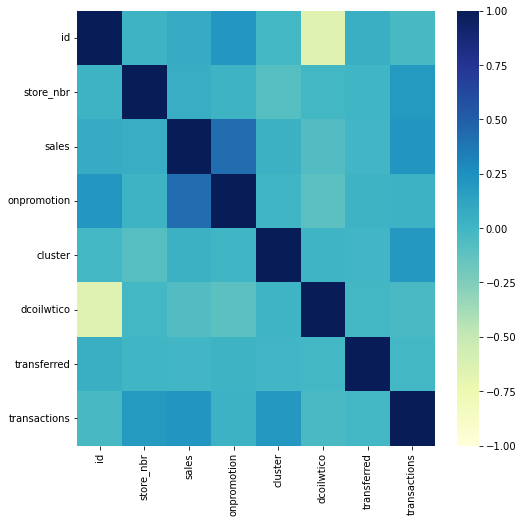

In [154]:
plt.figure(figsize = (8,8))
sns.heatmap(Train.corr(), vmin = -1 , cmap = 'YlGnBu')

In [155]:
Train.drop(columns = ["date_x",'date_y','locale_name','id','type_x','state'], inplace = True)
Train.head()

store_nbr      family  sales  onpromotion  Sales_date     city  cluster  \
0         25  AUTOMOTIVE   0.00            0  2013-01-01  Salinas        1   
1         25   BABY CARE   0.00            0  2013-01-01  Salinas        1   
2         25      BEAUTY   2.00            0  2013-01-01  Salinas        1   
3         25   BEVERAGES 810.00            0  2013-01-01  Salinas        1   
4         25       BOOKS   0.00            0  2013-01-01  Salinas        1   

   dcoilwtico   type_y    locale  transferred  transactions  
0       93.14  Holiday  National        False           770  
1       93.14  Holiday  National        False           770  
2       93.14  Holiday  National        False           770  
3       93.14  Holiday  National        False           770  
4       93.14  Holiday  National        False           770

#### One hot Encoding on the city column

In [156]:
cities_encoded = pd.get_dummies(Train.city)
cities_encoded

Ambato  Babahoyo  Cayambe  Cuenca  Daule  El Carmen  Esmeraldas  \
0             0         0        0       0      0          0           0   
1             0         0        0       0      0          0           0   
2             0         0        0       0      0          0           0   
3             0         0        0       0      0          0           0   
4             0         0        0       0      0          0           0   
...         ...       ...      ...     ...    ...        ...         ...   
2805226       0         0        0       0      0          0           0   
2805227       0         0        0       0      0          0           0   
2805228       0         0        0       0      0          0           0   
2805229       0         0        0       0      0          0           0   
2805230       0         0        0       0      0          0           0   

         Guaranda  Guayaquil  Ibarra  ...  Loja  Machala  Manta  Playas  Puyo  \
0               0          0       0  ...     0        0      0       0     0   
1               0          0       0  ...     0        0      0       0     0   
2               0          0       0  ...     0        0      0       0     0   
3               0          0       0  ...     0        0      0       0     0   
4               0          0       0  ...     0        0      0       0     0   
...           ...        ...     ...  ...   ...      ...    ...     ...   ...   
2805226         0          0       0  ...     0        0      0       0     0   
2805227         0          0       0  ...     0        0      0       0     0   
2805228         0          0       0  ...     0        0      0       0     0   
2805229         0          0       0  ...     0        0      0       0     0   
2805230         0          0       0  ...     0        0      0       0     0   

         Quevedo  Quito  Riobamba  Salinas  Santo Domingo  
0              0      0         0        1              0  
1              0      0         0        1              0  
2              0      0         0        1              0  
3              0      0         0        1              0  
4              0      0         0        1              0  
...          ...    ...       ...      ...            ...  
2805226        0      1         0        0              0  
2805227        0      1         0        0              0  
2805228        0      1         0        0              0  
2805229        0      1         0        0              0  
2805230        0      1         0        0              0  

[2805231 rows x 22 columns]

In [157]:
Train = Train.join(pd.get_dummies(Train.city)).drop(columns='city')

In [158]:
Train.head()

store_nbr      family  sales  onpromotion  Sales_date  cluster  dcoilwtico  \
0         25  AUTOMOTIVE   0.00            0  2013-01-01        1       93.14   
1         25   BABY CARE   0.00            0  2013-01-01        1       93.14   
2         25      BEAUTY   2.00            0  2013-01-01        1       93.14   
3         25   BEVERAGES 810.00            0  2013-01-01        1       93.14   
4         25       BOOKS   0.00            0  2013-01-01        1       93.14   

    type_y    locale  transferred  ...  Loja  Machala  Manta  Playas  Puyo  \
0  Holiday  National        False  ...     0        0      0       0     0   
1  Holiday  National        False  ...     0        0      0       0     0   
2  Holiday  National        False  ...     0        0      0       0     0   
3  Holiday  National        False  ...     0        0      0       0     0   
4  Holiday  National        False  ...     0        0      0       0     0   

   Quevedo  Quito  Riobamba  Salinas  Santo Domingo  
0        0      0         0        1              0  
1        0      0         0        1              0  
2        0      0         0        1              0  
3        0      0         0        1              0  
4        0      0         0        1              0  

[5 rows x 33 columns]

#### Adding other important  important features to our data for modeling

In [159]:
def getDateFeatures(df, date):
    df['date'] = pd.to_datetime(df[date])
    df['month'] = df['date'].dt.month
    df['day_of_month'] = df['date'].dt.day
    df['day_of_year'] = df['date'].dt.dayofyear
    df['week_of_year'] = df['date'].dt.isocalendar().week
    df['day_of_week'] = df['date'].dt.dayofweek
    df['year'] = df['date'].dt.year
    df['is_weekend'] = np.where(df['day_of_week'] > 4, 1, 0)
    df['is_month_start'] = df['date'].dt.is_month_start.astype(int)
    df['is_month_end'] = df['date'].dt.is_month_end.astype(int)
    df['quarter'] = df['date'].dt.quarter
    df['is_quarter_start'] = df['date'].dt.is_quarter_start.astype(int)
    df['is_quarter_end'] = df['date'].dt.is_quarter_end.astype(int)
    df['is_year_start'] = df['date'].dt.is_year_end.astype(int)
    df['is_year_end'] = df['date'].dt.is_year_end.astype(int)
    
    return df

In [160]:
Train = getDateFeatures(Train,'Sales_date')

In [161]:
pd.set_option('display.max_columns' , None)

In [162]:
Train.head()

store_nbr      family  sales  onpromotion  Sales_date  cluster  dcoilwtico  \
0         25  AUTOMOTIVE   0.00            0  2013-01-01        1       93.14   
1         25   BABY CARE   0.00            0  2013-01-01        1       93.14   
2         25      BEAUTY   2.00            0  2013-01-01        1       93.14   
3         25   BEVERAGES 810.00            0  2013-01-01        1       93.14   
4         25       BOOKS   0.00            0  2013-01-01        1       93.14   

    type_y    locale  transferred  transactions  Ambato  Babahoyo  Cayambe  \
0  Holiday  National        False           770       0         0        0   
1  Holiday  National        False           770       0         0        0   
2  Holiday  National        False           770       0         0        0   
3  Holiday  National        False           770       0         0        0   
4  Holiday  National        False           770       0         0        0   

   Cuenca  Daule  El Carmen  Esmeraldas  Guaranda  Guayaquil  Ibarra  \
0       0      0          0           0         0          0       0   
1       0      0          0           0         0          0       0   
2       0      0          0           0         0          0       0   
3       0      0          0           0         0          0       0   
4       0      0          0           0         0          0       0   

   Latacunga  Libertad  Loja  Machala  Manta  Playas  Puyo  Quevedo  Quito  \
0          0         0     0        0      0       0     0        0      0   
1          0         0     0        0      0       0     0        0      0   
2          0         0     0        0      0       0     0        0      0   
3          0         0     0        0      0       0     0        0      0   
4          0         0     0        0      0       0     0        0      0   

   Riobamba  Salinas  Santo Domingo       date  month  day_of_month  \
0         0        1              0 2013-01-01      1             1   
1         0        1              0 2013-01-01      1             1   
2         0        1              0 2013-01-01      1             1   
3         0        1              0 2013-01-01      1             1   
4         0        1              0 2013-01-01      1             1   

   day_of_year  week_of_year  day_of_week  year  is_weekend  is_month_start  \
0            1             1            1  2013           0               1   
1            1             1            1  2013           0               1   
2            1             1            1  2013           0               1   
3            1             1            1  2013           0               1   
4            1             1            1  2013           0               1   

   is_month_end  quarter  is_quarter_start  is_quarter_end  is_year_start  \
0             0        1                 1               0              0   
1             0        1                 1               0              0   
2             0        1                 1               0              0   
3             0        1                 1               0              0   
4             0        1                 1               0              0   

   is_year_end  
0            0  
1            0  
2            0  
3            0  
4            0

#### Encoding the holiday column

In [163]:
le = preprocessing.LabelEncoder()
Train['family'] = le.fit_transform(Train.family)
Train['locale'] = le.fit_transform(Train.locale)
Train['type_y'] = le.fit_transform(Train.type_y)
Train['transferred'] = le.fit_transform(Train.transferred)

In [164]:
Train.head()

store_nbr  family  sales  onpromotion  Sales_date  cluster  dcoilwtico  \
0         25       0   0.00            0  2013-01-01        1       93.14   
1         25       1   0.00            0  2013-01-01        1       93.14   
2         25       2   2.00            0  2013-01-01        1       93.14   
3         25       3 810.00            0  2013-01-01        1       93.14   
4         25       4   0.00            0  2013-01-01        1       93.14   

   type_y  locale  transferred  transactions  Ambato  Babahoyo  Cayambe  \
0       3       1            0           770       0         0        0   
1       3       1            0           770       0         0        0   
2       3       1            0           770       0         0        0   
3       3       1            0           770       0         0        0   
4       3       1            0           770       0         0        0   

   Cuenca  Daule  El Carmen  Esmeraldas  Guaranda  Guayaquil  Ibarra  \
0       0      0          0           0         0          0       0   
1       0      0          0           0         0          0       0   
2       0      0          0           0         0          0       0   
3       0      0          0           0         0          0       0   
4       0      0          0           0         0          0       0   

   Latacunga  Libertad  Loja  Machala  Manta  Playas  Puyo  Quevedo  Quito  \
0          0         0     0        0      0       0     0        0      0   
1          0         0     0        0      0       0     0        0      0   
2          0         0     0        0      0       0     0        0      0   
3          0         0     0        0      0       0     0        0      0   
4          0         0     0        0      0       0     0        0      0   

   Riobamba  Salinas  Santo Domingo       date  month  day_of_month  \
0         0        1              0 2013-01-01      1             1   
1         0        1              0 2013-01-01      1             1   
2         0        1              0 2013-01-01      1             1   
3         0        1              0 2013-01-01      1             1   
4         0        1              0 2013-01-01      1             1   

   day_of_year  week_of_year  day_of_week  year  is_weekend  is_month_start  \
0            1             1            1  2013           0               1   
1            1             1            1  2013           0               1   
2            1             1            1  2013           0               1   
3            1             1            1  2013           0               1   
4            1             1            1  2013           0               1   

   is_month_end  quarter  is_quarter_start  is_quarter_end  is_year_start  \
0             0        1                 1               0              0   
1             0        1                 1               0              0   
2             0        1                 1               0              0   
3             0        1                 1               0              0   
4             0        1                 1               0              0   

   is_year_end  
0            0  
1            0  
2            0  
3            0  
4            0

In [165]:
Train.family.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [166]:
Train.head()

store_nbr  family  sales  onpromotion  Sales_date  cluster  dcoilwtico  \
0         25       0   0.00            0  2013-01-01        1       93.14   
1         25       1   0.00            0  2013-01-01        1       93.14   
2         25       2   2.00            0  2013-01-01        1       93.14   
3         25       3 810.00            0  2013-01-01        1       93.14   
4         25       4   0.00            0  2013-01-01        1       93.14   

   type_y  locale  transferred  transactions  Ambato  Babahoyo  Cayambe  \
0       3       1            0           770       0         0        0   
1       3       1            0           770       0         0        0   
2       3       1            0           770       0         0        0   
3       3       1            0           770       0         0        0   
4       3       1            0           770       0         0        0   

   Cuenca  Daule  El Carmen  Esmeraldas  Guaranda  Guayaquil  Ibarra  \
0       0      0          0           0         0          0       0   
1       0      0          0           0         0          0       0   
2       0      0          0           0         0          0       0   
3       0      0          0           0         0          0       0   
4       0      0          0           0         0          0       0   

   Latacunga  Libertad  Loja  Machala  Manta  Playas  Puyo  Quevedo  Quito  \
0          0         0     0        0      0       0     0        0      0   
1          0         0     0        0      0       0     0        0      0   
2          0         0     0        0      0       0     0        0      0   
3          0         0     0        0      0       0     0        0      0   
4          0         0     0        0      0       0     0        0      0   

   Riobamba  Salinas  Santo Domingo       date  month  day_of_month  \
0         0        1              0 2013-01-01      1             1   
1         0        1              0 2013-01-01      1             1   
2         0        1              0 2013-01-01      1             1   
3         0        1              0 2013-01-01      1             1   
4         0        1              0 2013-01-01      1             1   

   day_of_year  week_of_year  day_of_week  year  is_weekend  is_month_start  \
0            1             1            1  2013           0               1   
1            1             1            1  2013           0               1   
2            1             1            1  2013           0               1   
3            1             1            1  2013           0               1   
4            1             1            1  2013           0               1   

   is_month_end  quarter  is_quarter_start  is_quarter_end  is_year_start  \
0             0        1                 1               0              0   
1             0        1                 1               0              0   
2             0        1                 1               0              0   
3             0        1                 1               0              0   
4             0        1                 1               0              0   

   is_year_end  
0            0  
1            0  
2            0  
3            0  
4            0

Deriving days, month and year columns from the the datetime column

In [167]:
Train['year'] = pd.to_datetime(Train['Sales_date']).dt.year
Train['month'] = pd.to_datetime(Train['Sales_date']).dt.month
Train['week'] = pd.to_datetime(Train['Sales_date']).dt.week
Train['day'] = pd.to_datetime(Train['Sales_date']).dt.day
warnings.filterwarnings('ignore')

In [168]:
Train

store_nbr  family   sales  onpromotion  Sales_date  cluster  \
0               25       0    0.00            0  2013-01-01        1   
1               25       1    0.00            0  2013-01-01        1   
2               25       2    2.00            0  2013-01-01        1   
3               25       3  810.00            0  2013-01-01        1   
4               25       4    0.00            0  2013-01-01        1   
...            ...     ...     ...          ...         ...      ...   
2805226          9      28  438.13            0  2017-08-15        6   
2805227          9      29  154.55            1  2017-08-15        6   
2805228          9      30 2419.73          148  2017-08-15        6   
2805229          9      31  121.00            8  2017-08-15        6   
2805230          9      32   16.00            0  2017-08-15        6   

         dcoilwtico  type_y  locale  transferred  transactions  Ambato  \
0             93.14       3       1            0           770       0   
1             93.14       3       1            0           770       0   
2             93.14       3       1            0           770       0   
3             93.14       3       1            0           770       0   
4             93.14       3       1            0           770       0   
...             ...     ...     ...          ...           ...     ...   
2805226       47.57       3       0            0          2155       0   
2805227       47.57       3       0            0          2155       0   
2805228       47.57       3       0            0          2155       0   
2805229       47.57       3       0            0          2155       0   
2805230       47.57       3       0            0          2155       0   

         Babahoyo  Cayambe  Cuenca  Daule  El Carmen  Esmeraldas  Guaranda  \
0               0        0       0      0          0           0         0   
1               0        0       0      0          0           0         0   
2               0        0       0      0          0           0         0   
3               0        0       0      0          0           0         0   
4               0        0       0      0          0           0         0   
...           ...      ...     ...    ...        ...         ...       ...   
2805226         0        0       0      0          0           0         0   
2805227         0        0       0      0          0           0         0   
2805228         0        0       0      0          0           0         0   
2805229         0        0       0      0          0           0         0   
2805230         0        0       0      0          0           0         0   

         Guayaquil  Ibarra  Latacunga  Libertad  Loja  Machala  Manta  Playas  \
0                0       0          0         0     0        0      0       0   
1                0       0          0         0     0        0      0       0   
2                0       0          0         0     0        0      0       0   
3                0       0          0         0     0        0      0       0   
4                0       0          0         0     0        0      0       0   
...            ...     ...        ...       ...   ...      ...    ...     ...   
2805226          0       0          0         0     0        0      0       0   
2805227          0       0          0         0     0        0      0       0   
2805228          0       0          0         0     0        0      0       0   
2805229          0       0          0         0     0        0      0       0   
2805230          0       0          0         0     0        0      0       0   

         Puyo  Quevedo  Quito  Riobamba  Salinas  Santo Domingo       date  \
0           0        0      0         0        1              0 2013-01-01   
1           0        0      0         0        1              0 2013-01-01   
2           0        0      0         0        1              0 2013-01-01   
3           0        0      0    

In [169]:
Train.drop(columns = ["Sales_date",'date'], inplace = True)
Train.head()

store_nbr  family  sales  onpromotion  cluster  dcoilwtico  type_y  locale  \
0         25       0   0.00            0        1       93.14       3       1   
1         25       1   0.00            0        1       93.14       3       1   
2         25       2   2.00            0        1       93.14       3       1   
3         25       3 810.00            0        1       93.14       3       1   
4         25       4   0.00            0        1       93.14       3       1   

   transferred  transactions  Ambato  Babahoyo  Cayambe  Cuenca  Daule  \
0            0           770       0         0        0       0      0   
1            0           770       0         0        0       0      0   
2            0           770       0         0        0       0      0   
3            0           770       0         0        0       0      0   
4            0           770       0         0        0       0      0   

   El Carmen  Esmeraldas  Guaranda  Guayaquil  Ibarra  Latacunga  Libertad  \
0          0           0         0          0       0          0         0   
1          0           0         0          0       0          0         0   
2          0           0         0          0       0          0         0   
3          0           0         0          0       0          0         0   
4          0           0         0          0       0          0         0   

   Loja  Machala  Manta  Playas  Puyo  Quevedo  Quito  Riobamba  Salinas  \
0     0        0      0       0     0        0      0         0        1   
1     0        0      0       0     0        0      0         0        1   
2     0        0      0       0     0        0      0         0        1   
3     0        0      0       0     0        0      0         0        1   
4     0        0      0       0     0        0      0         0        1   

   Santo Domingo  month  day_of_month  day_of_year  week_of_year  day_of_week  \
0              0      1             1            1             1            1   
1              0      1             1            1             1            1   
2              0      1             1            1             1            1   
3              0      1             1            1             1            1   
4              0      1             1            1             1            1   

   year  is_weekend  is_month_start  is_month_end  quarter  is_quarter_start  \
0  2013           0               1             0        1                 1   
1  2013           0               1             0        1                 1   
2  2013           0               1             0        1                 1   
3  2013           0               1             0        1                 1   
4  2013           0               1             0        1                 1   

   is_quarter_end  is_year_start  is_year_end  week  day  
0               0              0            0     1    1  
1               0              0            0     1    1  
2               0              0            0     1    1  
3               0              0            0     1    1  
4               0              0            0     1    1

In [170]:
Train[Train['year'] ==2017].month.unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [171]:
Train[Train['year'] ==2013].month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

### Spliting dataset to train and test set

In [172]:
Train_set = Train.loc[(Train['year'].isin([2013, 2014, 2015, 2016]) & Train['year'].isin([2013, 2014, 2015, 2016]))]
Test_set = Train.loc[(Train['year'].isin([2017]) & Train['year'].isin([2017]))]

In [173]:
Test_set.year.unique()

array([2017])

In [174]:
Train_set.year.unique()

array([2013, 2014, 2015, 2016])

## MODELLING

In [178]:
# Training data
y = Train["sales"]
X = Train.drop(columns = ["sales"])


In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2103923, 47) (2103923,)
(701308, 47) (701308,)


#### MODEL ONE : SIMPLE LINEAR REGRESSION

In [180]:
##Linear Regression
lr_model = LinearRegression()
model = lr_model.fit(X_train, y_train)
predictions = lr_model.predict(X_test)

In [182]:
# get importance
importance = lr_model.coef_

In [183]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 1.03605
Feature: 1, Score: -11.88395
Feature: 2, Score: 37.62110
Feature: 3, Score: 0.47781
Feature: 4, Score: -0.15953
Feature: 5, Score: 3.66727
Feature: 6, Score: 0.22875
Feature: 7, Score: -66.39999
Feature: 8, Score: 0.22902
Feature: 9, Score: -54.81768
Feature: 10, Score: 14.91805
Feature: 11, Score: -16.82228
Feature: 12, Score: 29.56316
Feature: 13, Score: 24.65159
Feature: 14, Score: -8.76225
Feature: 15, Score: 12.05503
Feature: 16, Score: -7.37990
Feature: 17, Score: 7.89617
Feature: 18, Score: -52.51871
Feature: 19, Score: -0.12374
Feature: 20, Score: 33.04147
Feature: 21, Score: -43.73178
Feature: 22, Score: 42.42568
Feature: 23, Score: -51.77527
Feature: 24, Score: 20.47304
Feature: 25, Score: -24.34367
Feature: 26, Score: 40.45622
Feature: 27, Score: 26.64983
Feature: 28, Score: -58.81300
Feature: 29, Score: 38.60162
Feature: 30, Score: 28.35644
Feature: 31, Score: 176.51830
Feature: 32, Score: 2.39553
Feature: 33, Score: -6.09074
Feature: 34, Score: 0

In [184]:
# Converting the feature importance data into a dataframe
importance = pd.DataFrame(importance, columns = ["score"]).reset_index()
importance["Feature"] = list(X.columns)
importance.drop(columns = ["index"], inplace = True)
importance.sort_values(by = "score", ascending = False)
importance



# Visualizing the feature importance
fig = px.bar(importance, x = "Feature", y = "score")
fig.show()

#### SECOND MODEL:DECISION TREE REGRESSION

In [185]:
decision_tree_model = DecisionTreeRegressor(random_state = 0)

In [186]:
sn = decision_tree_model.fit(X,y)

In [187]:
y_pred = decision_tree_model.predict(X_test)

In [188]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.1699949093898175e-15

In [189]:
np.sqrt(mean_squared_log_error(y_test, y_pred))

3.712050403897015e-18

Checking important features using the decision tree model

In [190]:
sn_importance = sn.feature_importances_
sn_importance = pd.DataFrame(sn_importance, columns = ["score"]).reset_index()
sn_importance["Feature"] = list(X.columns)
sn_importance.drop(columns = ["index"], inplace = True)
sn_importance.sort_values(by = "score", ascending = False).head()

score       Feature
1    0.38        family
2    0.24   onpromotion
8    0.22  transactions
36   0.05          year
3    0.02       cluster

#### THIRD MODEL : RANDOM FOREST

In [191]:
rf = RandomForestRegressor(n_estimators = 300, max_features = 
                           'sqrt', max_depth = 5, random_state = 18).fit(X_train, y_train)

In [192]:
prediction = rf.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.05
print(mse)
print(rmse)

887905.6429651739
1.9834366816371676


In [193]:
np.sqrt(mean_squared_log_error(y_test, y_pred))

3.712050403897015e-18

Checking for important features

In [194]:
## Feature Importance of the Random Forest Model
rf_importance = rf.feature_importances_
rf_importance = pd.DataFrame(rf_importance, columns = ["score"]).reset_index()
rf_importance["Feature"] = list(X.columns)
rf_importance.drop(columns = ["index"], inplace = True)
rf_importance.sort_values(by = "score", ascending = False).head()

score       Feature
2    0.44   onpromotion
1    0.30        family
8    0.10  transactions
0    0.05     store_nbr
27   0.04         Quito

In [195]:
fig = px.bar(rf_importance, x = "Feature", y = "score")
fig.show()

### Dropping some features that were not considered very important during previous 

In [196]:
Train

store_nbr  family   sales  onpromotion  cluster  dcoilwtico  type_y  \
0               25       0    0.00            0        1       93.14       3   
1               25       1    0.00            0        1       93.14       3   
2               25       2    2.00            0        1       93.14       3   
3               25       3  810.00            0        1       93.14       3   
4               25       4    0.00            0        1       93.14       3   
...            ...     ...     ...          ...      ...         ...     ...   
2805226          9      28  438.13            0        6       47.57       3   
2805227          9      29  154.55            1        6       47.57       3   
2805228          9      30 2419.73          148        6       47.57       3   
2805229          9      31  121.00            8        6       47.57       3   
2805230          9      32   16.00            0        6       47.57       3   

         locale  transferred  transactions  Ambato  Babahoyo  Cayambe  Cuenca  \
0             1            0           770       0         0        0       0   
1             1            0           770       0         0        0       0   
2             1            0           770       0         0        0       0   
3             1            0           770       0         0        0       0   
4             1            0           770       0         0        0       0   
...         ...          ...           ...     ...       ...      ...     ...   
2805226       0            0          2155       0         0        0       0   
2805227       0            0          2155       0         0        0       0   
2805228       0            0          2155       0         0        0       0   
2805229       0            0          2155       0         0        0       0   
2805230       0            0          2155       0         0        0       0   

         Daule  El Carmen  Esmeraldas  Guaranda  Guayaquil  Ibarra  Latacunga  \
0            0          0           0         0          0       0          0   
1            0          0           0         0          0       0          0   
2            0          0           0         0          0       0          0   
3            0          0           0         0          0       0          0   
4            0          0           0         0          0       0          0   
...        ...        ...         ...       ...        ...     ...        ...   
2805226      0          0           0         0          0       0          0   
2805227      0          0           0         0          0       0          0   
2805228      0          0           0         0          0       0          0   
2805229      0          0           0         0          0       0          0   
2805230      0          0           0         0          0       0          0   

         Libertad  Loja  Machala  Manta  Playas  Puyo  Quevedo  Quito  \
0               0     0        0      0       0     0        0      0   
1               0     0        0      0       0     0        0      0   
2               0     0        0      0       0     0        0      0   
3               0     0        0      0       0     0        0      0   
4               0     0        0      0       0     0        0      0   
...           ...   ...      ...    ...     ...   ...      ...    ...   
2805226         0     0        0      0       0     0        0      1   
2805227         0     0        0      0       0     0        0      1   
2805228         0     0        0      0       0     0        0      1   
2805229         0     0        0      0       0     0        0      1   
2805230         0     0        0      0       0     0        0      1   

         Riobamba  Salinas  Santo Domingo  month  day_of_month  day_of_year  \
0               0        1              0      1             1            1   
1               0        1              0      1             1     

In [197]:
Trains= Train.drop(columns = ["type_y",'locale','transferred','Ambato','Babahoyo','Daule','El Carmen','Esmeraldas',
                             'Cayambe','Cuenca','Guaranda','Guayaquil','Ibarra','Latacunga','Libertad',
                             'Loja','Machala','Manta','Playas','Puyo','Quevedo','Riobamba','Salinas',
                             'Santo Domingo','day','is_quarter_start','is_quarter_end','week_of_year'])
Trains.head()

store_nbr  family  sales  onpromotion  cluster  dcoilwtico  transactions  \
0         25       0   0.00            0        1       93.14           770   
1         25       1   0.00            0        1       93.14           770   
2         25       2   2.00            0        1       93.14           770   
3         25       3 810.00            0        1       93.14           770   
4         25       4   0.00            0        1       93.14           770   

   Quito  month  day_of_month  day_of_year  day_of_week  year  is_weekend  \
0      0      1             1            1            1  2013           0   
1      0      1             1            1            1  2013           0   
2      0      1             1            1            1  2013           0   
3      0      1             1            1            1  2013           0   
4      0      1             1            1            1  2013           0   

   is_month_start  is_month_end  quarter  is_year_start  is_year_end  week  
0               1             0        1              0            0     1  
1               1             0        1              0            0     1  
2               1             0        1              0            0     1  
3               1             0        1              0            0     1  
4               1             0        1              0            0     1

In [198]:
Train_set1 = Trains.loc[(Trains['year'].isin([2013, 2014, 2015, 2016]) & Trains['year'].isin([2013, 2014, 2015, 2016]))]
Test_set1 = Trains.loc[(Trains['year'].isin([2017]) & Trains['year'].isin([2017]))]

In [199]:
y = Trains["sales"]
X = Trains.drop(columns = ["sales"])

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2103923, 19) (2103923,)
(701308, 19) (701308,)


#### LinearRegression_model for filtered train set

In [201]:
lr1_model = LinearRegression()
model = lr1_model.fit(X_train, y_train)
predictions = lr1_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_log_error(y_test, predictions))

In [203]:
importance = lr1_model.coef_
# Converting the feature importance data into a dataframe
importance = pd.DataFrame(importance, columns = ["score"]).reset_index()
importance["Feature"] = list(X.columns)
importance.drop(columns = ["index"], inplace = True)
importance.sort_values(by = "score", ascending = False)
importance



# Visualizing the feature importance
fig = px.bar(importance, x = "Feature", y = "score")
fig.show()

### Decision_tree_model for filtered train set

In [204]:
decision_tree_model = DecisionTreeRegressor(random_state = 0)
dt = decision_tree_model.fit(X,y)

In [205]:
y_pred = decision_tree_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

1.6491765213376432e-15

In [206]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.6491765213376432e-15

In [207]:
np.sqrt(mean_squared_log_error(y_test, y_pred))

4.946243025902699e-18

### Random Rorest Model for filtered train set

In [208]:
rf1 = RandomForestRegressor(n_estimators = 300, max_features = 
                           'sqrt', max_depth = 5, random_state = 18).fit(X_train, y_train)

In [209]:
prediction = rf1.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.05
print(mse)
print(rmse)

689605.7955038893
1.9585291740307709


In [210]:
np.sqrt(mean_squared_log_error(y_test, y_pred))

4.946243025902699e-18

In [211]:
rf1_importance = rf1.feature_importances_
rf1_importance = pd.DataFrame(rf1_importance, columns = ["score"]).reset_index()
rf1_importance["Feature"] = list(X.columns)
rf1_importance.drop(columns = ["index"], inplace = True)
rf1_importance.sort_values(by = "score", ascending = False).head()
fig = px.bar(rf_importance, x = "Feature", y = "score")
fig.show()